In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mp
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter # Para formatear los ejes
from scipy.stats import norm

#### Se carga el archivo que contiene el dataset

In [165]:
df = pd.read_csv("train.csv")
pd.set_option('display.max_columns', 23) #ver todas las columnas
pd.set_option('display.max_rows', 25) #como mucho ver 25 filas

# 1. Observaciones preliminares sobre los datos

#### Algunas observaciones preliminares (adicionales al instructivo de Navent) son:

- Sólo 8 atributos son comunes a todos los valores
- Se podrían renombrar varias columnas
- Podria cambiarse el orden de algunas columnas

In [4]:
df.info() #42 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

No hay filas duplicadas:

In [5]:
len(df.drop_duplicates()) 

240000

#### Con respecto a los tipos de datos:
- id, antiguedad, habitaciones, garages, banos, metroscubiertos, metrostotales, idzonas y precio pueden ser int
- gimnasio, usosmultiples, piscina, escuelascercanas, centroscomercialescercanos pueden ser bool
- fecha se puede pasar a datetime
- tipodepropiedad, ciudad y provincia podrían ser categorías


In [6]:
df.describe()

id     antiguedad   habitaciones        garages  \
count  240000.000000  196445.000000  217529.000000  202235.000000   
mean   149969.382092       8.116114       2.902326       1.546874   
std     86634.579744       9.553830       0.896894       0.853507   
min         1.000000       0.000000       1.000000       0.000000   
25%     74930.750000       0.000000       2.000000       1.000000   
50%    149875.500000       5.000000       3.000000       2.000000   
75%    225016.500000      10.000000       3.000000       2.000000   
max    299999.000000      80.000000      10.000000       3.000000   

               banos  metroscubiertos  metrostotales        idzona  \
count  213779.000000    222600.000000  188533.000000  2.113790e+05   
mean        2.132417       174.016774     176.765145  2.423468e+06   
std         0.912546        98.152950      94.427328  1.056794e+07   
min         1.000000        15.000000      15.000000  2.200000e+01   
25%         1.000000        90.000000     102.000000  2.489000e+04   
50%         2.000000       153.000000     155.000000  5.638300e+04   
75%         3.000000       240.000000     238.000000  8.783800e+04   
max         4.000000       439.000000     439.000000  5.000400e+07   

                 lat            lng       gimnasio  usosmultiples  \
count  116512.000000  116512.000000  240000.000000  240000.000000   
mean       20.696818     -99.509221       0.062475       0.055092   
std         3.137884       9.744143       0.242017       0.228160   
min      -100.886679    -125.859375       0.000000       0.000000   
25%        19.359846    -100.977908       0.000000       0.000000   
50%        19.543273     -99.240387       0.000000       0.000000   
75%        20.740005     -99.134777       0.000000       0.000000   
max        83.026219     121.036000       1.000000       1.000000   

             piscina  escuelascercanas  centroscomercialescercanos  \
count  240000.000000     240000.000000               240000.000000   
mean        0.087383          0.444142                    0.396533   
std         0.282397          0.496871                    0.489179   
min         0.000000          0.000000                    0.000000   
25%         0.000000          0.000000                    0.000000   
50%         0.000000          0.000000                    0.000000   
75%         0.000000          1.000000                    1.000000   
max         1.000000          1.000000                    1.000000   

             precio  
count  2.400000e+05  
mean   2.530838e+06  
std    2.152552e+06  
min    3.100000e+05  
25%    9.527725e+05  
50%    1.850000e+06  
75%    3.390000e+06  
max    1.252500e+07

En cuanto a los datos que son strings, hay todo tipo de inconsistencias

In [7]:
df[['direccion', 'descripcion', 'titulo']]

direccion  \
0       Avenida Division del Norte 2005   
1                            AV. MEXICO   
2                           Urbi Tonala   
3         IGNACIO MANUEL ALTAMIRANO 128   
4                       PASEOS DEL SOL    
...                                 ...   
239995                          BOSQUES   
239996              Filiberto Navas 325   
239997                 Nicolas San Juan   
239998            Javier Rojo Gomez 120   
239999                        AVE. STIM   

                                              descripcion  \
0       depto. interior de 80.15m2, consta de sala com...   
1       <p>entre sonora y guerrero, atr&aacute;s del h...   
2       descripcion \nla mejor ubicacion residencial e...   
3       casa en privada con caseta de vigilancia casas...   
4       bonito departamento en excelentes condiciones ...   
...                                                   ...   
239995  vendo casa en bosques de ica residencial a 10 ...   
239996  casa con un jardin amplio, un cuarto de servic...   
239997  departamento con excelente ubicación, muy cerc...   
239998  casa sola, dividida en cuatro departamentos de...   
239999  id:19816, muy bonito e iluminado departamento,...   

                                                   titulo  
0                                       depto. tipo a-402  
1                          condominio horizontal en venta  
2                   casa en venta urbi 3 recamaras tonala  
3       casa sola en toluca zinacantepec con credito i...  
4                                          paseos del sol  
...                                                   ...  
239995  bonita casas de 2 recamaras a 10 minutos del c...  
239996  casa en condominio a 10 min. del centro de toluca  
239997                                   nicolas san juan  
239998                      casa sola. javier rojo gomez.  
239999  departamento en bosques de las lomas  / av. st...  

[240000 rows x 3 columns]

Todos los precios parecen ser enteros

In [23]:
df['precio'].sample(10)

208595     420000.0
137153    1675000.0
144750     390000.0
124079    2790000.0
212821    1900000.0
173140     980000.0
137556    1395000.0
179695    1600000.0
139519    2300000.0
195942     725000.0
Name: precio, dtype: float64

#### Se cambian los nombres y se reordenan en un nuevo dataframe

In [24]:
nombresNuevos = {
                 'id' : 'ID',
                 'titulo' : 'Titulo',
                 'descripcion' : 'Descripcion',
                 'tipodepropiedad' : 'TipoPropiedad',
                 'direccion' : 'Direccion',
                 'ciudad' : 'Ciudad',
                 'provincia' : 'Provincia',
                 'antiguedad' : 'Antiguedad',
                 'habitaciones' : 'CantHabitaciones',
                 'garages' : 'CantGarages',
                 'banos' : 'CantBanos',
                 'metroscubiertos' : 'MetrosCuadradosCubiertos',
                 'metrostotales' : 'MetrosCuadradosTotales',
                 'idzona' : 'IDZona',
                 'lat' : 'Latitud',
                 'lng' : 'Longitud',
                 'fecha' : 'Fecha',
                 'gimnasio' : 'TieneGimnasio',
                 'usosmultiples' : 'TieneUsosMultiples',
                 'piscina' : 'TienePileta',
                 'escuelascercanas' : 'TieneEscuelasCerca',
                 'centroscomercialescercanos' : 'TieneShoppingsCerca',
                 'precio' : 'Precio'
                
}

dfok = df.rename(columns = nombresNuevos)

In [25]:
nombresEnOrden = [
                 'ID',
                 'Titulo',
                 'TipoPropiedad',
                 'Precio',
                 'Fecha',
                 'Antiguedad',
                 'MetrosCuadradosCubiertos',
                 'MetrosCuadradosTotales',
                 'Descripcion',
                 
                 'CantHabitaciones',
                 'CantGarages',
                 'CantBanos',
               
                 'IDZona',
                 'Direccion',
                 'Ciudad',
                 'Provincia',
                 'Latitud',
                 'Longitud',
                 
                 'TieneGimnasio',
                 'TieneUsosMultiples',
                 'TienePileta',
                 'TieneEscuelasCerca',
                 'TieneShoppingsCerca'
    ]                 

dfok = dfok[nombresEnOrden]
dfok.head()

ID                                             Titulo  \
0  254099                                  depto. tipo a-402   
1   53461                     condominio horizontal en venta   
2  247984              casa en venta urbi 3 recamaras tonala   
3  209067  casa sola en toluca zinacantepec con credito i...   
4  185997                                     paseos del sol   

        TipoPropiedad     Precio                Fecha  Antiguedad  \
0         Apartamento  2273000.0  2015-08-23 00:00:00         NaN   
1  Casa en condominio  3600000.0  2013-06-28 00:00:00        10.0   
2                Casa  1200000.0  2015-10-17 00:00:00         5.0   
3                Casa   650000.0  2012-03-09 00:00:00         1.0   
4         Apartamento  1150000.0  2016-06-07 00:00:00        10.0   

   MetrosCuadradosCubiertos  MetrosCuadradosTotales  \
0                      80.0                    80.0   
1                     268.0                   180.0   
2                     144.0                   166.0   
3                      63.0                    67.0   
4                      95.0                    95.0   

                                         Descripcion  CantHabitaciones  \
0  depto. interior de 80.15m2, consta de sala com...               2.0   
1  <p>entre sonora y guerrero, atr&aacute;s del h...               3.0   
2  descripcion \nla mejor ubicacion residencial e...               3.0   
3  casa en privada con caseta de vigilancia casas...               2.0   
4  bonito departamento en excelentes condiciones ...               2.0   

   CantGarages  CantBanos   IDZona                        Direccion  \
0          1.0        2.0  23533.0  Avenida Division del Norte 2005   
1          2.0        2.0  24514.0                       AV. MEXICO   
2          2.0        2.0  48551.0                      Urbi Tonala   
3          1.0        1.0  53666.0    IGNACIO MANUEL ALTAMIRANO 128   
4          1.0        1.0  47835.0                  PASEOS DEL SOL    

                   Ciudad         Provincia    Latitud   Longitud  \
0           Benito Juárez  Distrito Federal        NaN        NaN   
1  La Magdalena Contreras  Distrito Federal  19.310205 -99.227655   
2                  Tonalá           Jalisco        NaN        NaN   
3            Zinacantepec    Edo. de México  19.301890 -99.688015   
4                 Zapopan           Jalisco        NaN        NaN   

   TieneGimnasio  TieneUsosMultiples  TienePileta  TieneEscuelasCerca  \
0            0.0                 0.0          0.0                 0.0   
1            0.0                 0.0          0.0                 1.0   
2            0.0                 0.0          0.0                 0.0   
3            0.0                 0.0          0.0                 1.0   
4            0.0                 0.0          0.0                 0.0   

   TieneShoppingsCerca  
0                  0.0  
1                  1.0  
2                  0.0  
3                  1.0  
4                  0.0

Se adecuan los tipos de datos en el nuevo dataframe para los tipos de datos que no tienen NaNs

In [27]:
#int
dfok['ID'] = dfok['ID'].astype(np.uint32)
dfok['Precio'] = dfok['Precio'].astype(np.uint32)

# Booleanos
dfok['TieneGimnasio'] = dfok['TieneGimnasio'].astype(np.bool)
dfok['TieneUsosMultiples'] = dfok['TieneUsosMultiples'].astype(np.bool)
dfok['TienePileta'] = dfok['TienePileta'].astype(np.bool)
dfok['TieneEscuelasCerca'] = dfok['TieneEscuelasCerca'].astype(np.bool)
dfok['TieneShoppingsCerca'] = dfok['TieneShoppingsCerca'].astype(np.bool)

# Fecha
dfok['Fecha'] = dfok['Fecha'].astype('datetime64')

#### Hay muchas filas que contienen una cantidad mayor de metros cubiertos que de metros totales, pero si se mira la descripción se ve que esto no es un error: es sólo una nomenclatura confusa.

In [28]:
pd.options.display.max_colwidth = 1000 ## Ver strings largos
dfok[ ( dfok['MetrosCuadradosCubiertos'] > dfok['MetrosCuadradosTotales'] ) & ( dfok['ID'] >= 47890 ) ].head()

ID                                  Titulo       TipoPropiedad  \
1    53461          condominio horizontal en venta  Casa en condominio   
12   47890  hermosa casa en zibata queretaro 170m²                Casa   
13  130216      casa matias romero - sión bancaria                Casa   
14  181436             casa en venta en valle real                Casa   
21  224513              casa en venta en querétaro  Casa en condominio   

     Precio      Fecha  Antiguedad  MetrosCuadradosCubiertos  \
1   3600000 2013-06-28        10.0                     268.0   
12  1500000 2013-08-12         0.0                     170.0   
13  3000000 2015-03-31        20.0                     227.0   
14  5300000 2014-11-25         NaN                     250.0   
21  2300000 2016-02-01         NaN                     181.0   

    MetrosCuadradosTotales  \
1                    180.0   
12                   141.0   
13                   185.0   
14                   231.0   
21                   150.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Descripcion  \
1   <p>entre sonora y guerrero, atr&aacute;s del hospital &aacute;ngeles del pedregal, en excelente estado de conservaci&oacute;n, construida en 3 niveles, estacionamiento para 2 autos, 3 rec&aacute;maras con pisos de madera natural la principal con vestidor y ba&ntilde;o, 2 ba&ntilde;os completos pisos y muros de loseta espa&ntilde;ola, canceler&iacute;a de aluminio, 2 medios ba&ntilde;os, cocina integral con piso de loseta espa&ntilde;ola, sala de t.v., sala con piso de loseta espa&ntilde;ola, vest&iacute;bulo, comedor con piso de madera, l&iacute;nea telef&oacute;nica, terraza techada con policarbonato puede ser antecomedor, cuarto de servicio con piso de loseta, fachada con policarbonato..&nbsp; 4 casas</p>   
12                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            <p><strong>casa </strong>en venta en fraccionamiento con campo de golf <strong>zibat&aacute;</strong>, 141.4 m de terreno, 170 m de construcci&oacute;n, en esquina, jardin de 98 m, 3 recamaras, 2 1/2 ba&ntilde;os, cocina, cochera 2 autos.</p>   
13                                                   flamante casa habitación en condominio horizontal, desarrollada en 3 niveles. planta baja: estancia, comedor, cocina con desayunador, sala, cuarto de tv, 3 recamaras, 2 baños completos, patio de servicio, cuarto de servicio con baño, estacionamiento para 2 vehículos con cochera semicubierta; ubicada en la calle matías romero, colonia del valle.  la mejor zona de méxico. 3 niveles, cochera, condominio horizontal. 227 m2 construcción 185 m2 terreno etapa - emplazamiento entrega - 36 meses solo pagos de contado.  garantía de entrega**invierte 3 ya que su valor comercial es de $6. los remates bancarios son una gran opción de sión y no representan riesgo alguno.   
14                                                                                                   

In [29]:
pd.options.display.max_colwidth = 100 # Volver a strings más cortos 

# 2. Análisis

## 2.1. Generalidades

En un primer acercamiento, se estudian distribuciones sin un hilo conductor concreto, y se hacen algunas preguntas de interés general

### 2.1.1. ¿Cuándo se publican más propiedades?

<BarContainer object of 7 artists>

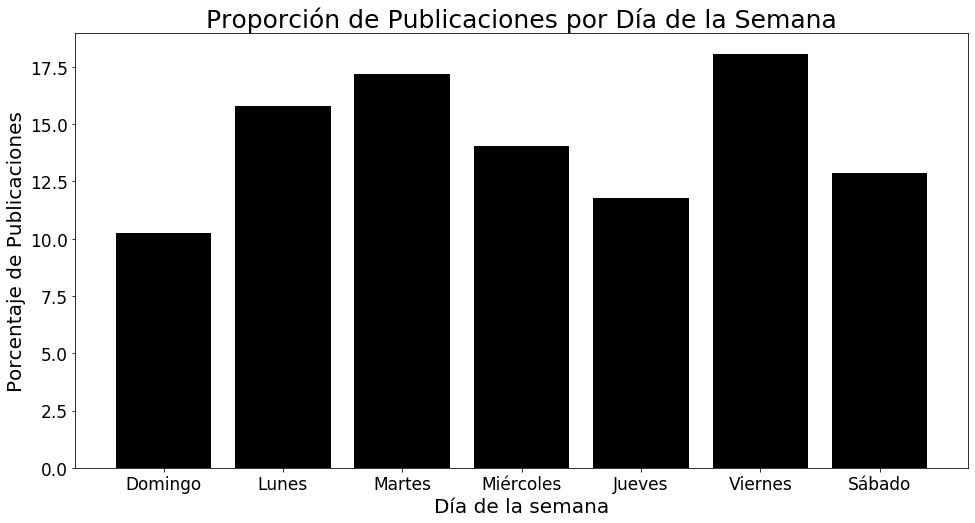

In [30]:
cantPub = [ 
             dfok[ dfok['Fecha'].dt.dayofweek == 6 ]['ID'].count() / 240000 * 100,
            dfok[ dfok['Fecha'].dt.dayofweek == 0 ]['ID'].count() / 240000 * 100,
           dfok[ dfok['Fecha'].dt.dayofweek == 1 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.dayofweek == 2 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.dayofweek == 3 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.dayofweek == 4 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.dayofweek == 5 ]['ID'].count()  / 240000 * 100
          ]

dias = ['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado']

dfdias = pd.DataFrame()
dfdias['Días'] = dias
dfdias['Pubs'] = cantPub

# Variables a graficar
x = dias
y = cantPub

# Tamaño del gráfico
fig = plt.figure(figsize = (16, 8))

# Tamaño de los títulos de los ejes
plt.ylabel("Porcentaje de Publicaciones", fontsize = 20);
plt.xlabel("Día de la Semana", fontsize = 20);

# Título
plt.title("Proporción de Publicaciones por Día de la Semana", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
#plt.xticks(rotation = 90)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
plt.bar(x, y, color = 'black')

<BarContainer object of 12 artists>

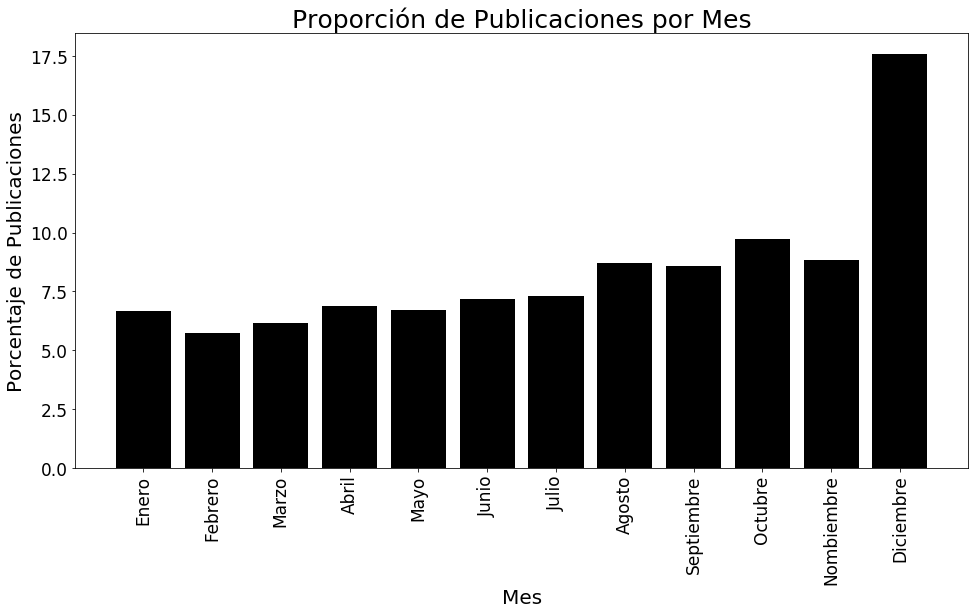

In [32]:
cantPub = [ 
            dfok[ dfok['Fecha'].dt.month == 1 ]['ID'].count() / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 2 ]['ID'].count() / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 3 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 4 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 5 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 6 ]['ID'].count() / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 7 ]['ID'].count() / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 8 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 9 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 10 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 11 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 12 ]['ID'].count()  / 240000 * 100
          ]

meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Nombiembre', 'Diciembre']

# Variables a graficar
x = meses
y = cantPub

# Tamaño del gráfico
fig = plt.figure(figsize = (16, 8))

# Tamaño de los títulos de los ejes
plt.ylabel("Porcentaje de Publicaciones", fontsize = 20);
plt.xlabel("Mes", fontsize = 20);

# Título
plt.title("Proporción de Publicaciones por Mes", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
plt.xticks(rotation = 90)

# Tipo de gráfico
plt.bar(x, y, color = 'black')

<BarContainer object of 31 artists>

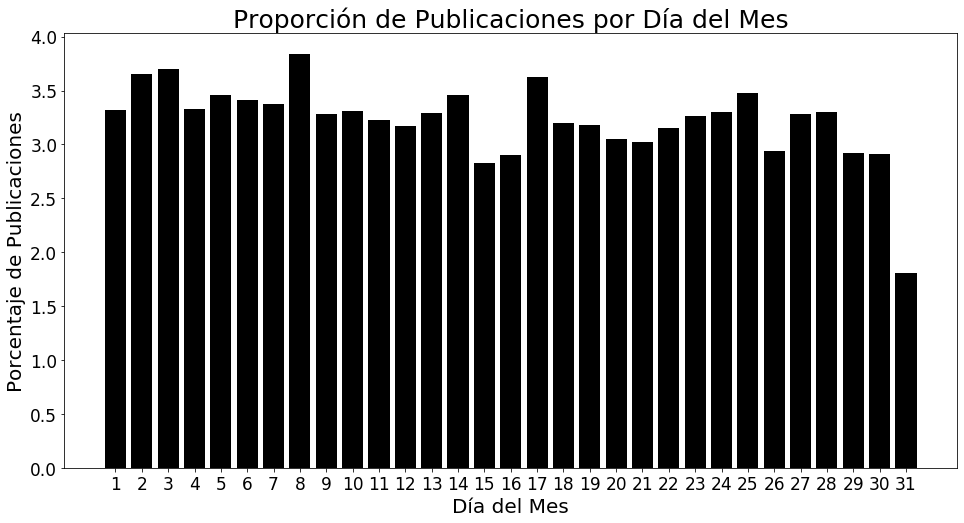

In [39]:
cantPub = [ ]
dias = []

for i in range(1, 32):
    cantPub.append( dfok[ dfok['Fecha'].dt.day == i ]['ID'].count() / 240000 * 100 )
    dias.append( str(i) ) 

# Variables a graficar
x = dias
y = cantPub

# Tamaño del gráfico
fig = plt.figure(figsize = (16, 8))

# Tamaño de los títulos de los ejes
plt.ylabel("Porcentaje de Publicaciones", fontsize = 20);
plt.xlabel("Día del Mes", fontsize = 20);

# Título
plt.title("Proporción de Publicaciones por Día del Mes", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
#plt.xticks(rotation = 90)

# Tipo de gráfico
plt.bar(x, y, color = 'black')

No se aprecian tendencias claras, excepto la de una tendencia al aumento a lo largo del año de la cantidad de publicaciones, con auge en Diciembre. Para confirmar este comportamiento, se realiza un análisis complementario.

### 2.1.2. ¿Cómo evolucionó la cantidad de propiedades publicadas con el tiempo?

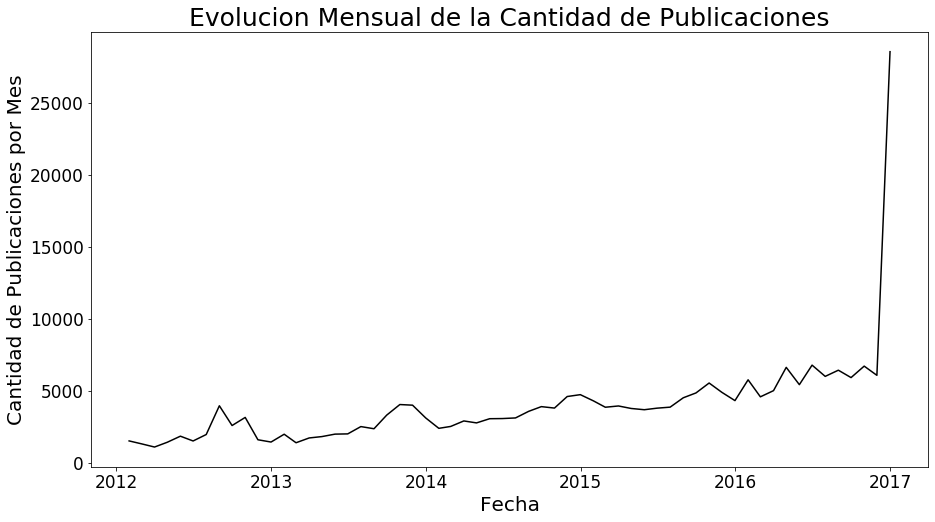

In [38]:
df_pubmes = dfok.copy()
df_pubmes["Fecha"] = df_pubmes["Fecha"].astype('datetime64')
df_pubmes.index = df_pubmes["Fecha"]
df_pubmes = pd.DataFrame(df_pubmes.resample('M').size()).reset_index()
df_pubmes = df_pubmes.rename(columns={0:"Cantidad"})
plt.figure(figsize=(15,8))
plt.plot("Fecha", "Cantidad", data=df_pubmes, color="black")
plt.title("Evolucion Mensual de la Cantidad de Publicaciones", fontsize=25)

plt.xlabel("Fecha", fontsize=20)
plt.ylabel("Cantidad de Publicaciones por Mes", fontsize=20);

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

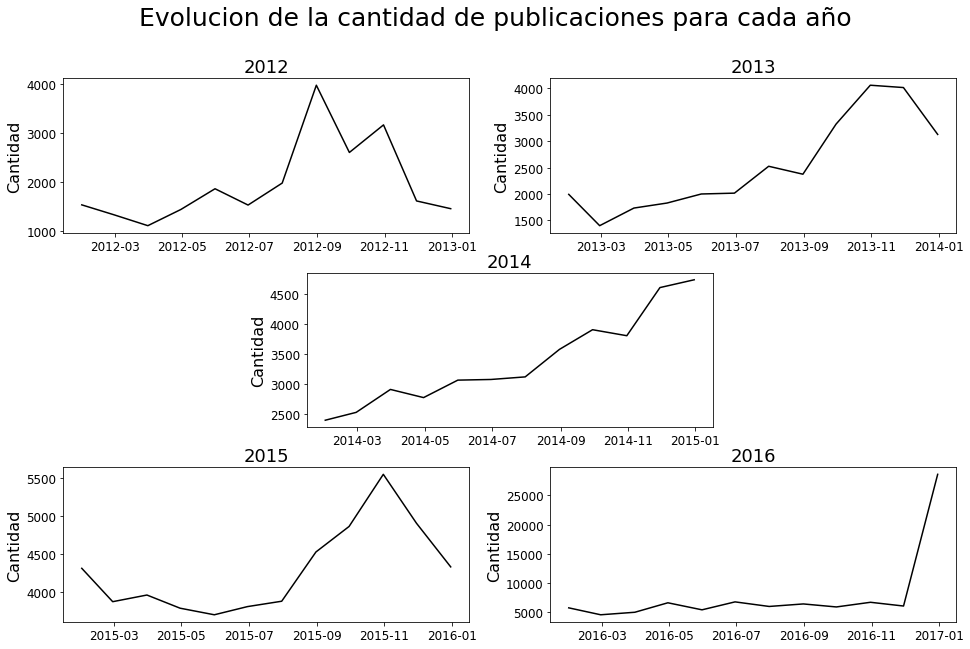

In [41]:
df_pub_an = dfok.copy()
df_pub_an["Fecha"] = df_pub_an["Fecha"].astype('datetime64')
df_pub_an.index = df_pub_an["Fecha"]
df_pub_an = pd.DataFrame(df_pub_an.resample('M').size())
pub_12 = df_pub_an["2012-01-01":"2013-01-01"].reset_index()
pub_13 = df_pub_an["2013-01-01":"2014-01-01"].reset_index()
pub_14 = df_pub_an["2014-01-01":"2015-01-01"].reset_index()
pub_15 = df_pub_an["2015-01-01":"2016-01-01"].reset_index()
pub_16 = df_pub_an["2016-01-01":"2017-01-01"].reset_index()
pub_12 = pub_12.rename(columns={0:"Cantidad"})
pub_13 = pub_13.rename(columns={0:"Cantidad"})
pub_14 = pub_14.rename(columns={0:"Cantidad"})
pub_15 = pub_15.rename(columns={0:"Cantidad"})
pub_16 = pub_16.rename(columns={0:"Cantidad"})

fig = plt.figure(figsize=(16,10))
grid = plt.GridSpec(6, 4, hspace=0.7, wspace=0.5)
pubs_12 = fig.add_subplot(grid[:2, 0:2])
pubs_13 = fig.add_subplot(grid[:2, 2:])
pubs_14 = fig.add_subplot(grid[2:4, 1:3])
pubs_15 = fig.add_subplot(grid[4:6, 0:2])
pubs_16 = fig.add_subplot(grid[4:6, 2:4])


pubs_12.plot("Fecha", "Cantidad", data=pub_12, color="black")
pubs_13.plot("Fecha", "Cantidad", data=pub_13, color="black")
pubs_14.plot("Fecha", "Cantidad", data=pub_14, color="black")
pubs_15.plot("Fecha", "Cantidad", data=pub_15, color="black")
pubs_16.plot("Fecha", "Cantidad", data=pub_16, color="black")

pubs_12.title.set_text("2012")
pubs_13.title.set_text("2013")
pubs_14.title.set_text("2014")
pubs_15.title.set_text("2015")
pubs_16.title.set_text("2016")

pubs_12.title.set_size(18)
pubs_13.title.set_size(18)
pubs_14.title.set_size(18)
pubs_15.title.set_size(18)
pubs_16.title.set_size(18)


pubs_12.set_ylabel("Cantidad", fontsize=16)
pubs_13.set_ylabel("Cantidad", fontsize=16)
pubs_14.set_ylabel("Cantidad", fontsize=16)
pubs_15.set_ylabel("Cantidad", fontsize=16)
pubs_16.set_ylabel("Cantidad", fontsize=16)

pubs_12.tick_params(axis='both', which='major', labelsize = 12)
pubs_12.tick_params(axis='both', which='minor', labelsize = 12)

pubs_13.tick_params(axis='both', which='major', labelsize = 12)
pubs_13.tick_params(axis='both', which='minor', labelsize = 12)

pubs_14.tick_params(axis='both', which='major', labelsize = 12)
pubs_14.tick_params(axis='both', which='minor', labelsize = 12)

pubs_15.tick_params(axis='both', which='major', labelsize = 12)
pubs_15.tick_params(axis='both', which='minor', labelsize = 12)

pubs_16.tick_params(axis='both', which='major', labelsize = 12)
pubs_16.tick_params(axis='both', which='minor', labelsize = 12)


fig.suptitle('Evolucion de la cantidad de publicaciones para cada año', size=25);

(array([736299., 736303., 736307., 736311., 736315., 736319., 736323.,
        736327., 736330.]), <a list of 9 Text xticklabel objects>)

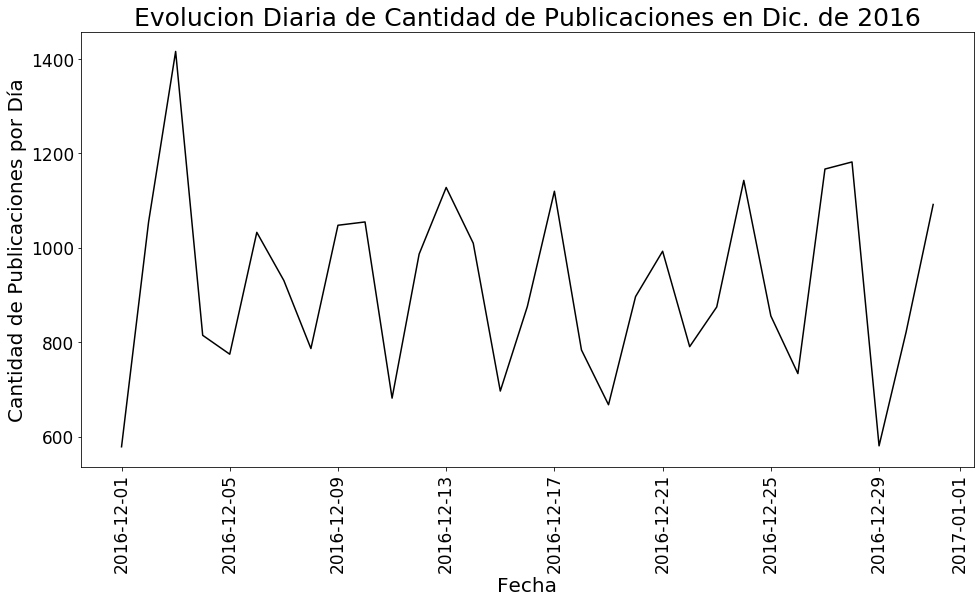

In [48]:
df_pubdic = dfok.copy()
df_pubdic["Fecha"] = df_pubdic["Fecha"].astype('datetime64')
df_pubdic.index = df_pubdic["Fecha"]
df_pubdic = df_pubdic.sort_index()
df_pubdic = df_pubdic["2016-12-01 00:00:00":"2017-01-02 00:00:00"]
df_pubdic = pd.DataFrame(df_pubdic.resample('D').size()).reset_index()
df_pubdic = df_pubdic.rename(columns={0:"Cantidad"})
plt.figure(figsize=(16,8))
plt.plot("Fecha", "Cantidad", data=df_pubdic, color="black")
plt.title("Evolucion Diaria de Cantidad de Publicaciones en Dic. de 2016", fontsize=25)
plt.xlabel("Fecha", fontsize=20)
plt.ylabel("Cantidad de Publicaciones por Día", fontsize=20);


# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
plt.xticks(rotation = 90)

Efectivamente, hay una tendencia a que la cantidad de publicaciones aumente más bien en la última parte del año. Un caso partticularmente interesante es el de 2016, donde la cantidad de publicaciones tiene un pico notable en diciembre.

En general, la cantidad de publicaciones a lo largo del período estudiado va en aumento.

### 2.1.3. ¿Cómo se distribuyen las propiedades según su cantidad de habitaciones?

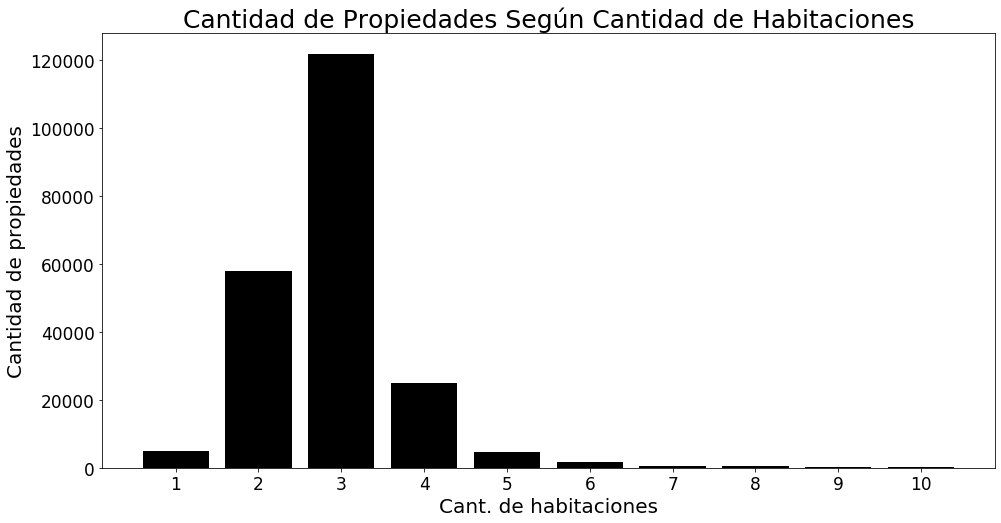

In [224]:
df_hab = dfok.groupby("CantHabitaciones").size()
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')
plt.bar(df_hab.index, df_hab.values, color = 'black')
plt.xlabel("Cant. de habitaciones", fontsize =20)
plt.ylabel("Cantidad de propiedades",fontsize=20)
plt.xticks([i for i in range(1,11)])
plt.title("Cantidad de Propiedades Según Cantidad de Habitaciones", fontsize=25
         );

plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

### 2.1.4. ¿Cómo se distribuyen las propiedades respecto de su antigüedad?

In [221]:
pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_rows', 100)
(dfok.groupby('Antiguedad').count()/240000)['ID']


Antiguedad
0.0     0.209729
1.0     0.051471
2.0     0.021079
3.0     0.023400
4.0     0.033100
5.0     0.138617
6.0     0.013204
7.0     0.008525
8.0     0.010075
9.0     0.004437
10.0    0.120183
11.0    0.005975
12.0    0.006217
13.0    0.002404
14.0    0.002567
15.0    0.016521
16.0    0.002917
17.0    0.002204
18.0    0.003783
19.0    0.001296
20.0    0.082933
21.0    0.003092
22.0    0.001867
23.0    0.001271
24.0    0.001125
25.0    0.009571
26.0    0.001538
27.0    0.001329
28.0    0.001650
29.0    0.000817
30.0    0.012729
31.0    0.000475
32.0    0.000821
33.0    0.000679
34.0    0.000438
35.0    0.003908
36.0    0.000412
37.0    0.000358
38.0    0.000596
39.0    0.000267
40.0    0.005613
41.0    0.000112
42.0    0.000250
43.0    0.000179
44.0    0.000175
45.0    0.001371
46.0    0.000129
47.0    0.000167
48.0    0.000150
49.0    0.000071
50.0    0.004971
51.0    0.000192
52.0    0.000046
53.0    0.000071
54.0    0.000037
55.0    0.000158
56.0    0.000013
57.0    0.000017
58.

In [166]:
df = pd.read_csv("train.csv")
pd.set_option('display.max_columns', 23) #ver todas las columnas
pd.set_option('display.max_rows', 25) #como mucho ver 25 filas

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

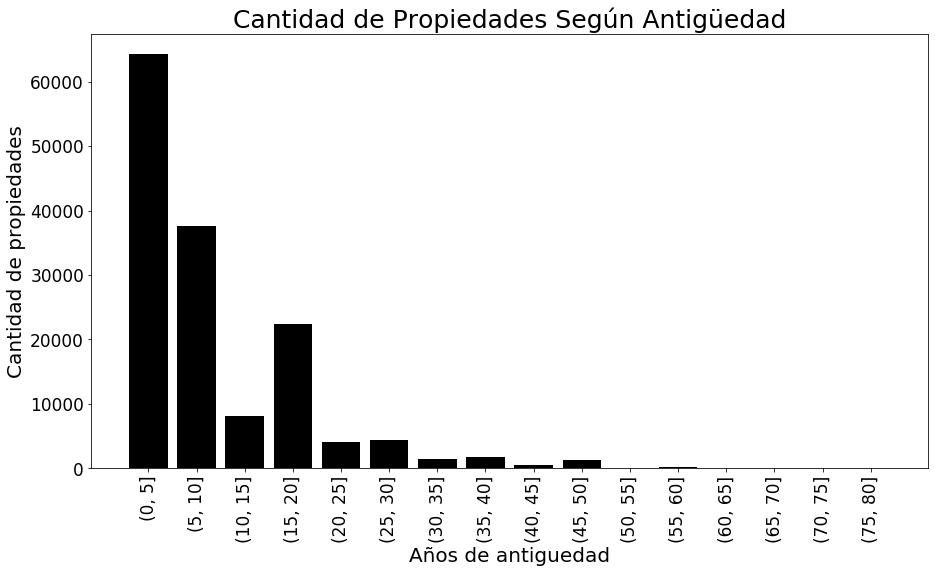

In [173]:
bins = pd.cut(dfok["Antiguedad"], [i for i in range(0, 81, 5)])
df_ant = dfok.groupby(bins).size()
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')
plt.bar(df_ant.index.astype(str), df_ant.values, color = 'black')
plt.xlabel("Años de antiguedad", fontsize=20)
plt.ylabel("Cantidad de propiedades",fontsize=20)
plt.title("Cantidad de Propiedades Según Antigüedad", fontsize=25);
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)
plt.xticks(rotation = 90)


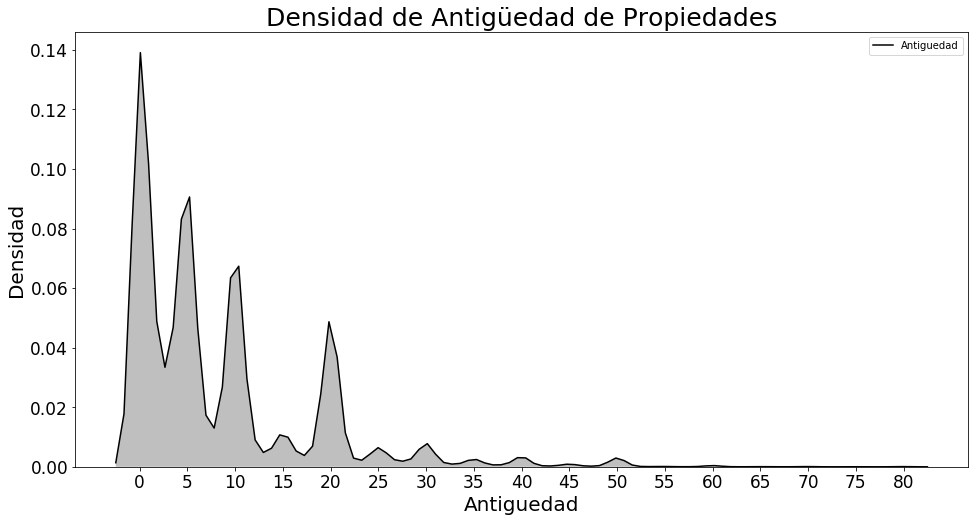

In [174]:
df_ant = dfok[pd.notnull(dfok["Antiguedad"])] # Dropeo los que son Nan para poder hacer el grafico de densidad

fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')
sb.kdeplot(df_ant['Antiguedad'], shade=True, color = 'black')
plt.xticks([i for i in range(0, 81, 5)])
plt.xlabel("Antiguedad", fontsize=20)
plt.ylabel("Densidad", fontsize=20)
plt.title("Densidad de Antigüedad de Propiedades", fontsize=25);
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)


La mayoria de las propiedades tienen una antiguedad relativamente baja(0-10 años).
 
Parece haber una preponderancia de valores que sean multiplos de 10 o de 5 con menor frecuencia (es decir, 20 años por sobre 19 o 21, 30 por sobre 29, 28 o 31, 15 por sobre 14 o 13, etc)

### 2.1.5. ¿Cómo se distribuyen las propiedades según su cantidad de metros cuadrados?

In [167]:
len(dfok[pd.notnull(dfok["MetrosCuadradosCubiertos"])]) / len(dfok)

0.9275

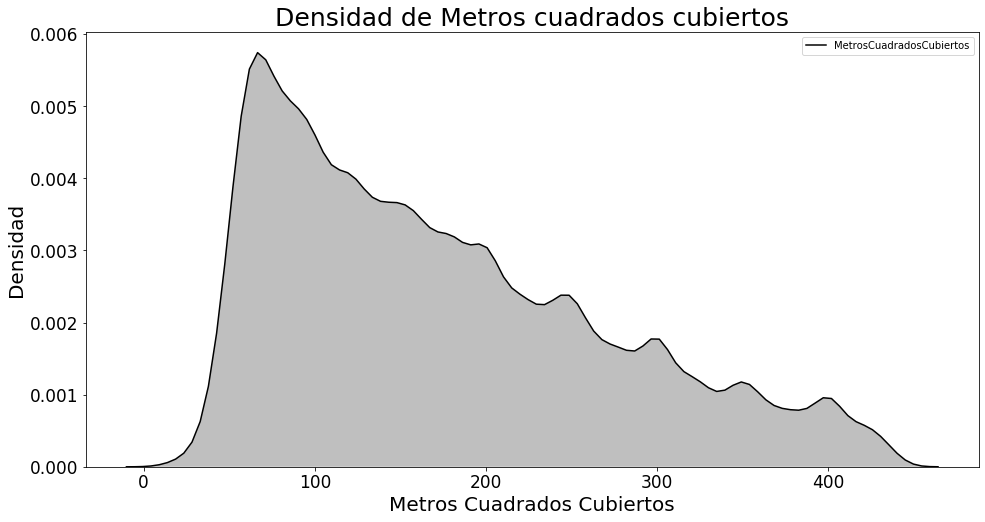

In [171]:
# Se eliminan los que son Nan para poder hacer el grafico de densidad
# siendo menos de un 10%
df_ant = dfok[pd.notnull(dfok["MetrosCuadradosCubiertos"])]

fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')
sb.kdeplot(df_ant['MetrosCuadradosCubiertos'], shade=True, color = 'black')
# plt.xticks([i for i in range(0, 81, 5)])

plt.xlabel("Metros Cuadrados Cubiertos", fontsize=20)
plt.ylabel("Densidad", fontsize=20)
plt.title("Densidad de Metros cuadrados cubiertos", fontsize=25)
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)
#ax.legend(fontsize=15);

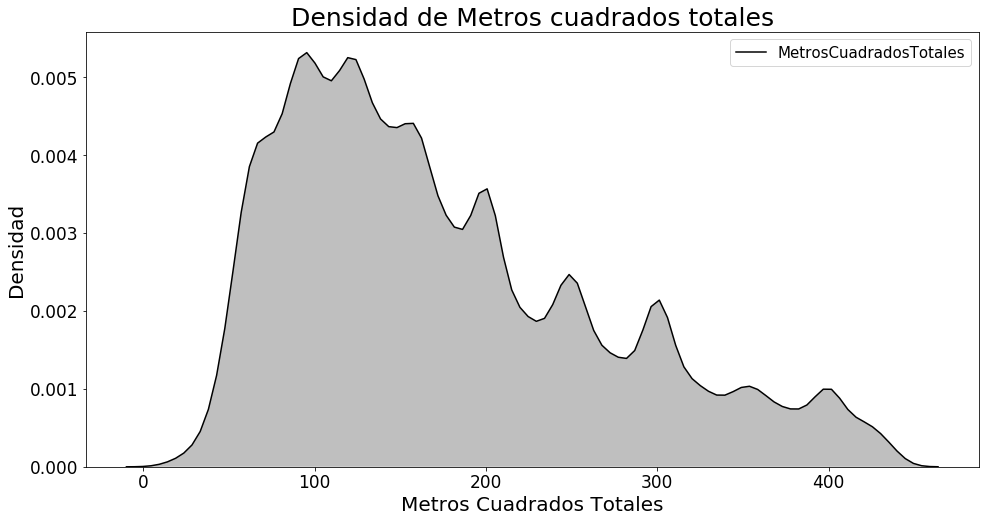

In [172]:
df_ant = dfok[pd.notnull(dfok["MetrosCuadradosTotales"])] # Dropeo los que son Nan para poder hacer el grafico de densidad

fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')
sb.kdeplot(df_ant['MetrosCuadradosTotales'], shade=True, color = 'black')
# plt.xticks([i for i in range(0, 81, 5)])
plt.xlabel("Metros Cuadrados Totales", fontsize=20)
plt.ylabel("Densidad", fontsize=20)
plt.title("Densidad de Metros cuadrados totales", fontsize=25)
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)
ax.legend(fontsize=15);

Se puede apreciar que la mayoria de las propiedades en ambos graficos caen en el rango de 0 - 150 metros, curiosamente la distribucion de metros cuadrados cubiertos parece alcanzar su pico y luego decrecer de manera casi lineal a medida que aumentan los metros.

Tambien en ambos graficos se puede ver que hay unos pequeños picos en valores multiplos de 50 como los son 150, 200, 250, 300 metros, etc. 

## 2.2. Estudio por Provincia

### 2.2.1. ¿En qué zonas se publican más propiedades?

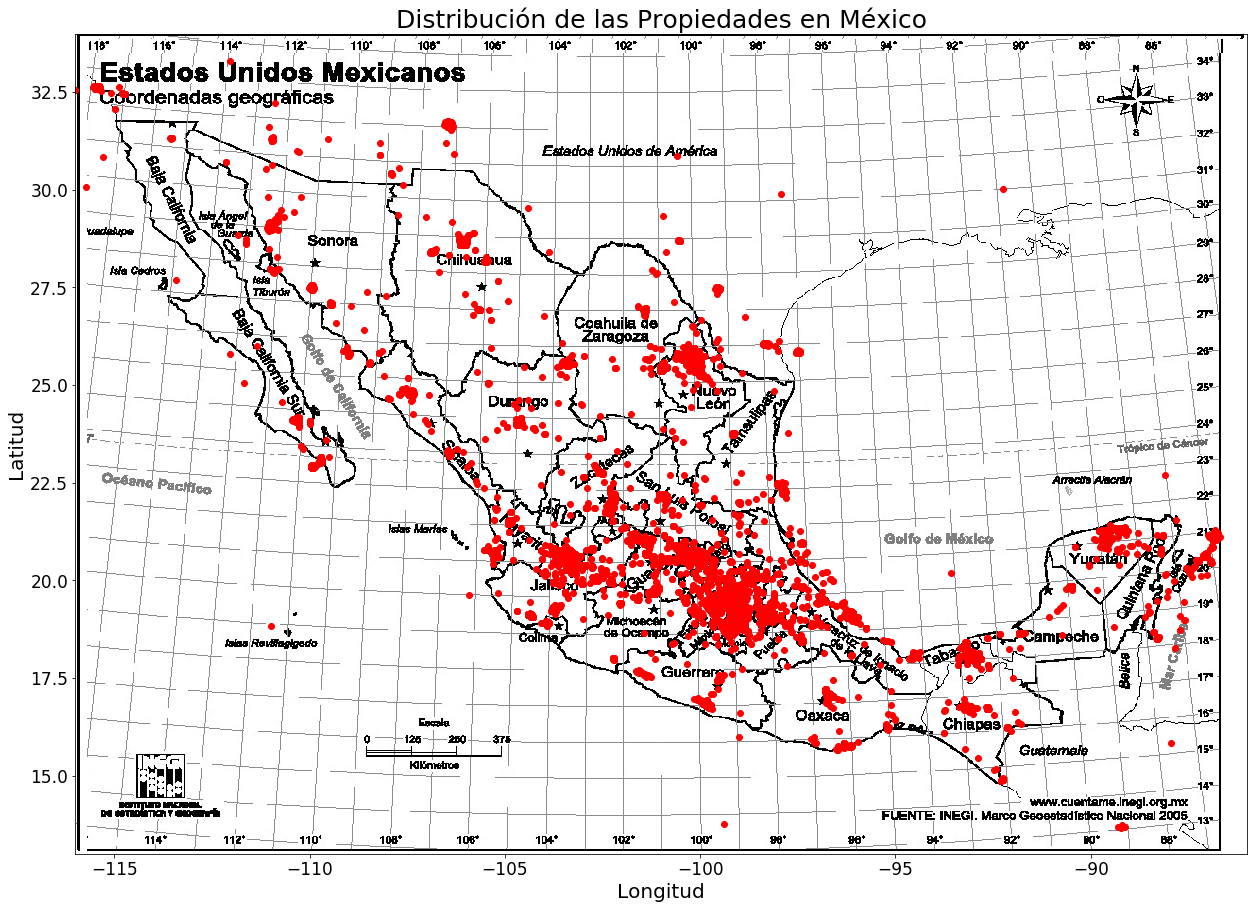

In [177]:
# Declarás variables a graficar
x = dfok['Longitud']
y = dfok['Latitud']

# Tamaño del gráfico
grafico, ax = plt.subplots(figsize = (21, 16));


img = plt.imread("mex.png")
ax.imshow(img, extent = [-116, -86, 13, 34])

# Tamaño de los títulos de los ejes
plt.xlabel("Longitud", fontsize = 20);
plt.ylabel("Latitud", fontsize = 20);

# Título
plt.title("Distribución de las Propiedades en México", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Límites para cada coordenada
plt.ylim([13, 34]);
plt.xlim([-116, -86]);

# Tipo de gráficok
plt.scatter(x, y, color = "red");


<BarContainer object of 32 artists>

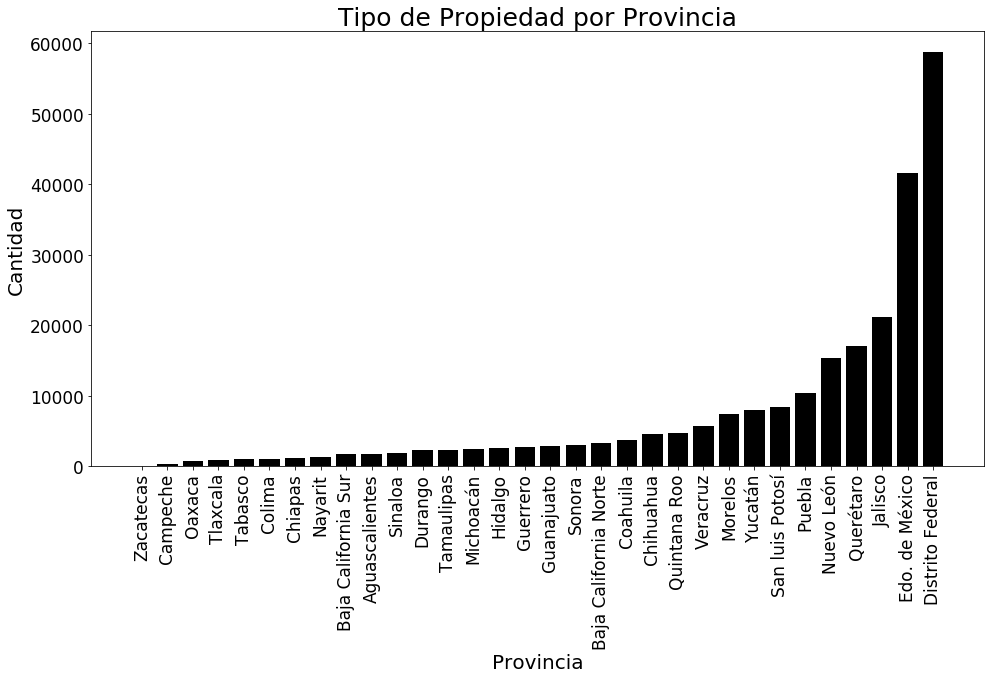

In [233]:
''' ¿Cuáles propiedades son más caras en promedio? '''

dfPorPropiedad = pd.DataFrame()
dfPorPropiedad['Provincia'] = pd.Series( dfok['Provincia'].unique(), index = dfok['Provincia'].unique() )
dfPorPropiedad['Precio'] = dfok.groupby('Provincia').count()['Precio']

dfPorPropiedad = dfPorPropiedad.dropna()
dfPorPropiedad['Precio'] = dfPorPropiedad['Precio'].astype(np.uint32)
dfPorPropiedad['Provincia'] = dfPorPropiedad['Provincia'].astype('category')
dfPorPropiedad = dfPorPropiedad.sort_values(['Precio'])

# Variables a graficar
x = dfPorPropiedad['Provincia']
y = dfPorPropiedad['Precio']

# Tamaño del gráfico
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')


# Tamaño de los títulos de los ejes
plt.xlabel("Provincia", fontsize = 20);
plt.ylabel("Cantidad", fontsize = 20);

# Título
plt.title("Tipo de Propiedad por Provincia", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
plt.xticks(rotation = 90)

# Límites para cada coordenada

# Tipo de gráficok
plt.bar(x, y, color = 'black')


México está en el hemisferio norte, por lo que la latitud debe ser positiva, ademas está al oeste del meridiano de Greenwich, por lo que su longitud debe ser negativa

### 2.2.2. ¿Dónde están las propiedades más caras y más baratas?

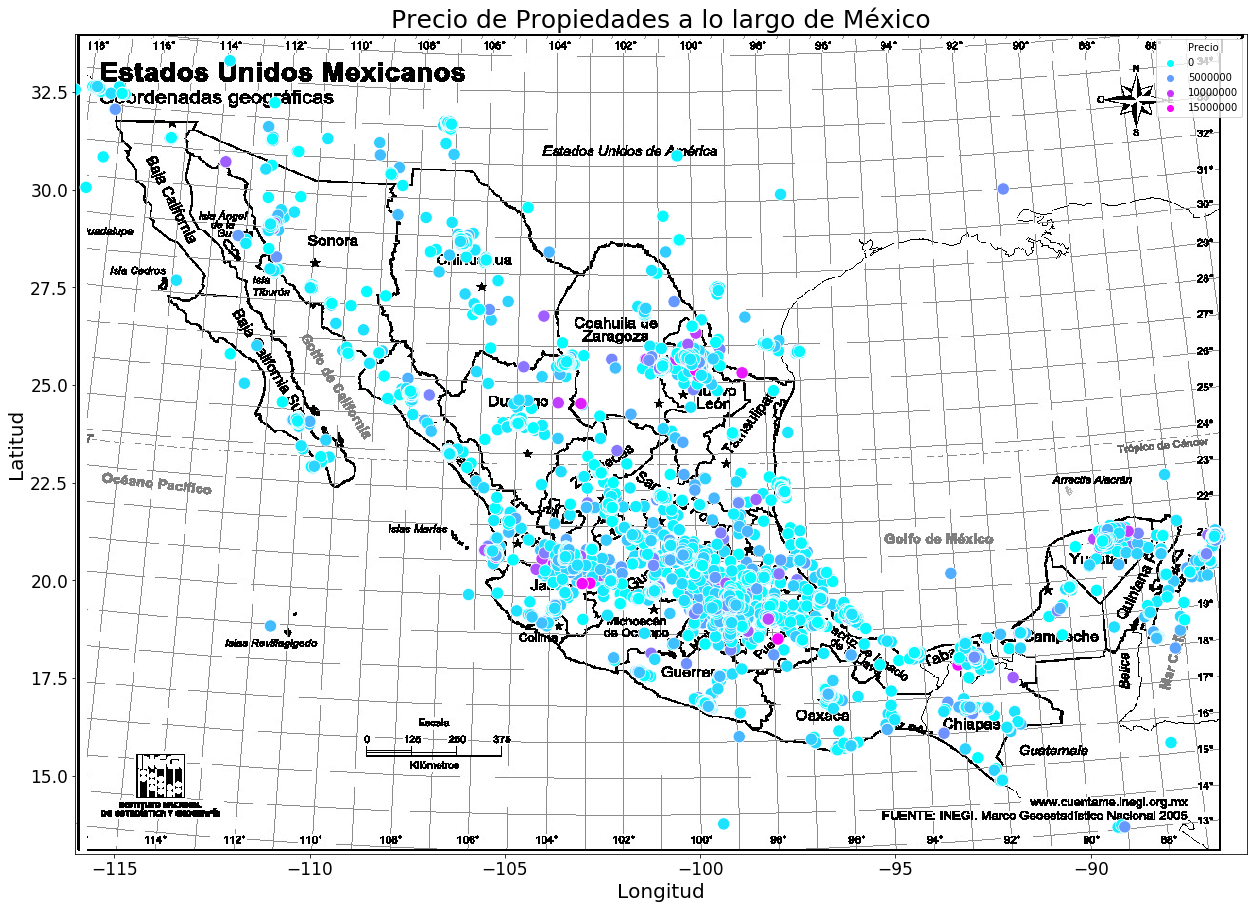

In [226]:
dfnuevo = pd.DataFrame()
dfnuevo['Longitud'] =  dfok['Longitud']
dfnuevo['Latitud'] = dfok['Latitud']
dfnuevo['Precio'] = dfok['Precio']

dfnuevo = dfnuevo.dropna()

grafico, ax = plt.subplots(figsize = (21, 16));

# Límites para cada coordenada
img = plt.imread("mex.png")
ax.imshow(img, extent = [-116, -86, 13, 34])

# Tamaño de los títulos de los ejes
plt.xlabel("Longitud", fontsize = 20);
plt.ylabel("Latitud", fontsize = 20);

# Título
plt.title("Precio de Propiedades a lo largo de México", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Límites para cada coordenada
plt.ylim([13, 34]);
plt.xlim([-116, -86]);

#cmap = sb.cubehelix_palette(dark = .3, light = .7, as_cmap = True)
#cmap = sb.color_palette(as_cmap = True)
#cmap = sb.color_palette("Paired", n_colors = dfnuevo['Precio'].nunique()) ##ESTE

#Cajita
#plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), prop={'size': 20})

#cmap = sb.hls_palette( len( dfnuevo['Precio'] ) )
cmap = plt.get_cmap("cool")
ax = sb.scatterplot(x = 'Longitud', y = 'Latitud', hue = 'Precio', palette = cmap, data = dfnuevo, s = 150)



<BarContainer object of 27 artists>

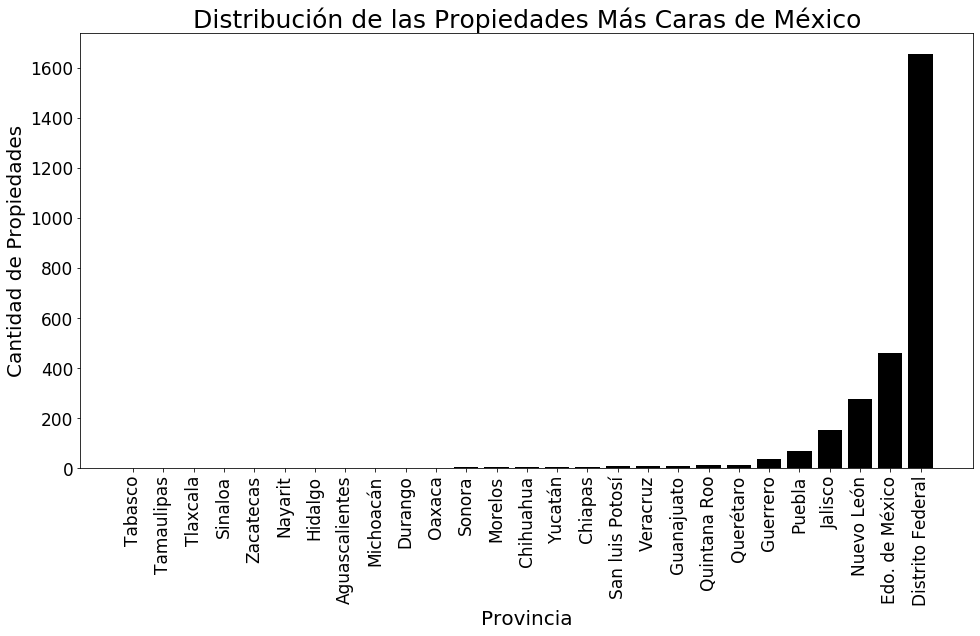

In [222]:
dflatlong = pd.DataFrame()
dflatlong['Provincia'] = pd.Series( dfok[ dfok['Precio'] > 10000000]['Provincia'].unique(), 
                                index = dfok[ dfok['Precio'] > 10000000]['Provincia'].unique() )

dflatlong['Cantidad'] = dfok[ dfok['Precio'] > 10000000].groupby('Provincia')['ID'].count()

# dfok[ dfok['Precio'] > 10000000].count() / len( dfok[ dfok['Precio'] > 10000000] ) #Casi no se pierde ninguno
dflatlong = dflatlong.dropna() 
dflatlong = dflatlong.sort_values(['Cantidad'])

# Variables a graficar
x = dflatlong['Provincia']
y = dflatlong['Cantidad']

# Tamaño del gráfico
fig = plt.figure(figsize = (16, 8))

# Tamaño de los títulos de los ejes
plt.xlabel("Provincia", fontsize = 20);
plt.ylabel("Cantidad de Propiedades", fontsize = 20);

# Título
plt.title("Distribución de las Propiedades Más Caras de México", fontsize = 25)
#Si de esta manera(⬆️) te tira error,hacé :plt.rcParams.update( { 'axes.titlesize':'30' } )
# mp.rcParams.update( { 'axes.titlesize':'30' } )

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
plt.xticks(rotation = 90)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
plt.bar(x, y, color = 'black')

#Línea de regresión
    #ldt = np.poly1d( np.polyfit(x, y, 1) )
    #plt.plot(x, ldt(x), "g")
    
# Cajita indicadora de colores 
#plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), prop={'size': 20})

# Resetear parámetros: plt.rcParams.update(plt.rcParamsDefault)



<BarContainer object of 32 artists>

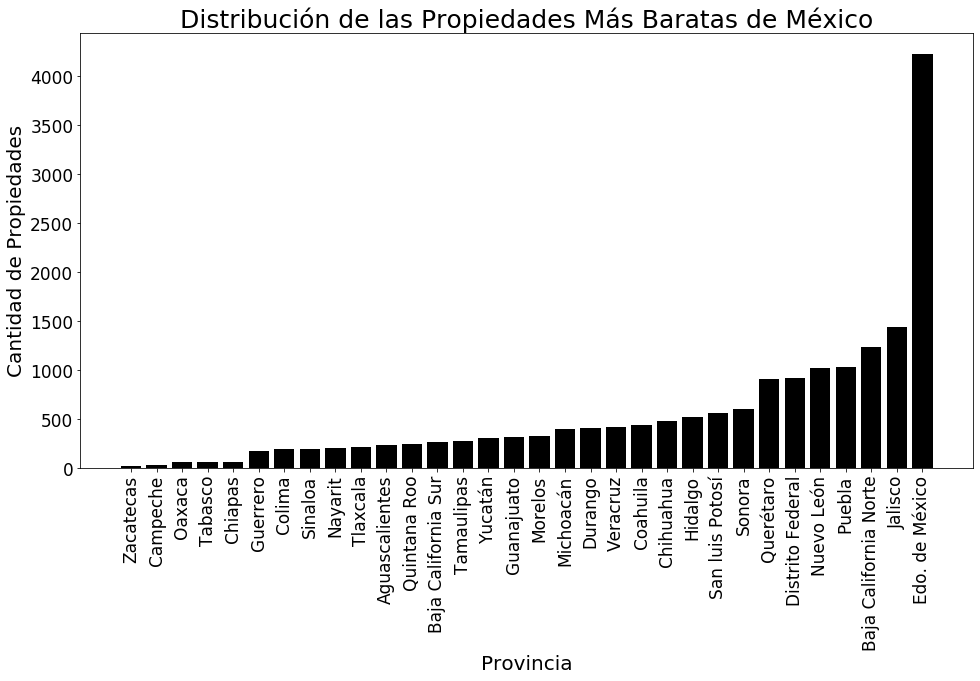

In [223]:
dflatlong = pd.DataFrame()
dflatlong['Provincia'] = pd.Series( dfok[ dfok['Precio'] < 500000]['Provincia'].unique(), 
                                index = dfok[ dfok['Precio'] < 500000]['Provincia'].unique() )

dflatlong['Cantidad'] = dfok[ dfok['Precio'] < 500000].groupby('Provincia')['ID'].count()

# dfok[ dfok['Precio'] < 500000].count() / len( dfok[ dfok['Precio'] > 10000000] ) #Casi no se pierde ninguno
dflatlong = dflatlong.dropna() 
dflatlong = dflatlong.sort_values(['Cantidad'])

# Variables a graficar
x = dflatlong['Provincia']
y = dflatlong['Cantidad']

# Tamaño del gráfico
fig = plt.figure(figsize = (16, 8))

# Tamaño de los títulos de los ejes
plt.xlabel("Provincia", fontsize = 20);
plt.ylabel("Cantidad de Propiedades", fontsize = 20);

# Título
plt.title("Distribución de las Propiedades Más Baratas de México", fontsize = 25)
#Si de esta manera(⬆️) te tira error,hacé :plt.rcParams.update( { 'axes.titlesize':'30' } )
# mp.rcParams.update( { 'axes.titlesize':'30' } )

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
plt.xticks(rotation = 90)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
plt.bar(x, y, color = 'black')

#Línea de regresión
    #ldt = np.poly1d( np.polyfit(x, y, 1) )
    #plt.plot(x, ldt(x), "g")
    
# Cajita indicadora de colores 
#plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), prop={'size': 20})

# Resetear parámetros: plt.rcParams.update(plt.rcParamsDefault)



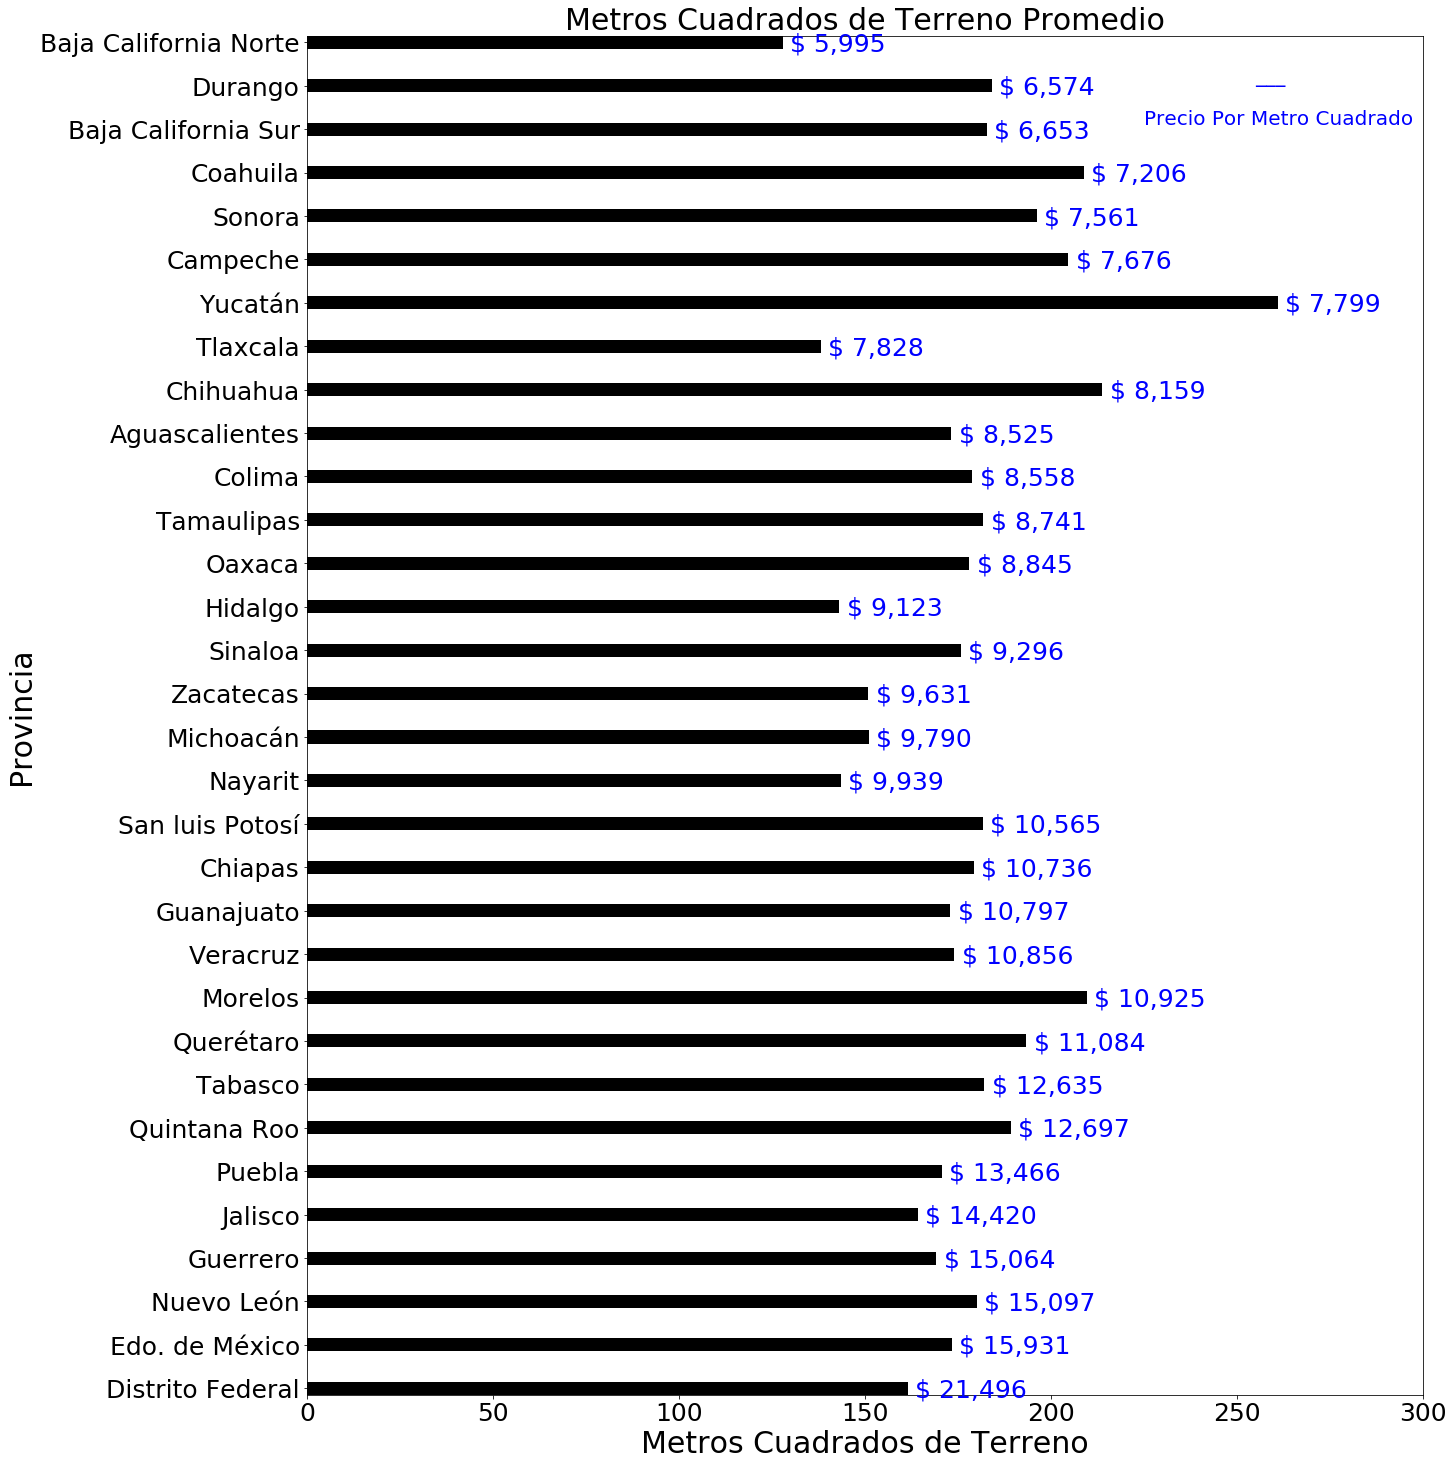

In [201]:
def analizarporm2(tipom, titulo, xaxis):
    dfms = pd.DataFrame()
    dfms['Provincia'] = dfok['Provincia'].dropna().sort_values().unique()
    dfms['MetrosTerreno'] = dfok.groupby('Provincia').mean()[tipom].to_list()
    dfms['PPPM2'] = ( dfok.sort_values('Provincia').groupby('Provincia')['Precio'].mean() /     \
           dfok.sort_values('Provincia').groupby('Provincia')[tipom].mean()
           ).to_list()

    dfms = dfms.sort_values('PPPM2')

    x = np.arange(len(dfms['Provincia']))

    ancho = 0.3
    fig, ax = plt.subplots(figsize = (20, 25))
    plt.barh(x, dfms['MetrosTerreno'], ancho, color = 'black')

    ##########################

    plt.title(titulo, fontsize = 30)

    y = np.arange(len(dfms['Provincia']))

    plt.yticks(y , y + 1)
    ax.set_yticklabels(dfms['Provincia'], fontsize=17)

    plt.xlabel(xaxis, fontsize = 30);
    plt.ylabel("Provincia", fontsize = 30);
    plt.autoscale(tight = True)

    plt.tick_params(axis='both', which='major', labelsize = 25)
    plt.tick_params(axis='both', which='minor', labelsize = 25)
    
    #ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), prop={'size': 20})
    ax.invert_yaxis()

    plt.xlim([0, 300]);

    l = dfms['MetrosTerreno'].to_list()

    ppm2 = dfms['PPPM2'].to_list()

    # Agregar texto en una posición específica
    for i in range( len(dfms['Provincia']) ):
        plt.text(x = l[i] + 2, y = i + 0.2, s = '$ {:,.0f}'.format(ppm2[i]), size = 25, color = 'blue')

    plt.text(x = 255, y = 0.9, s = '___', size = 20, color = 'blue')
    plt.text(x = 225, y = 1.9, s = 'Precio Por Metro Cuadrado', size = 20, color = 'blue')

analizarporm2('MetrosCuadradosTotales', "Metros Cuadrados de Terreno Promedio", "Metros Cuadrados de Terreno")

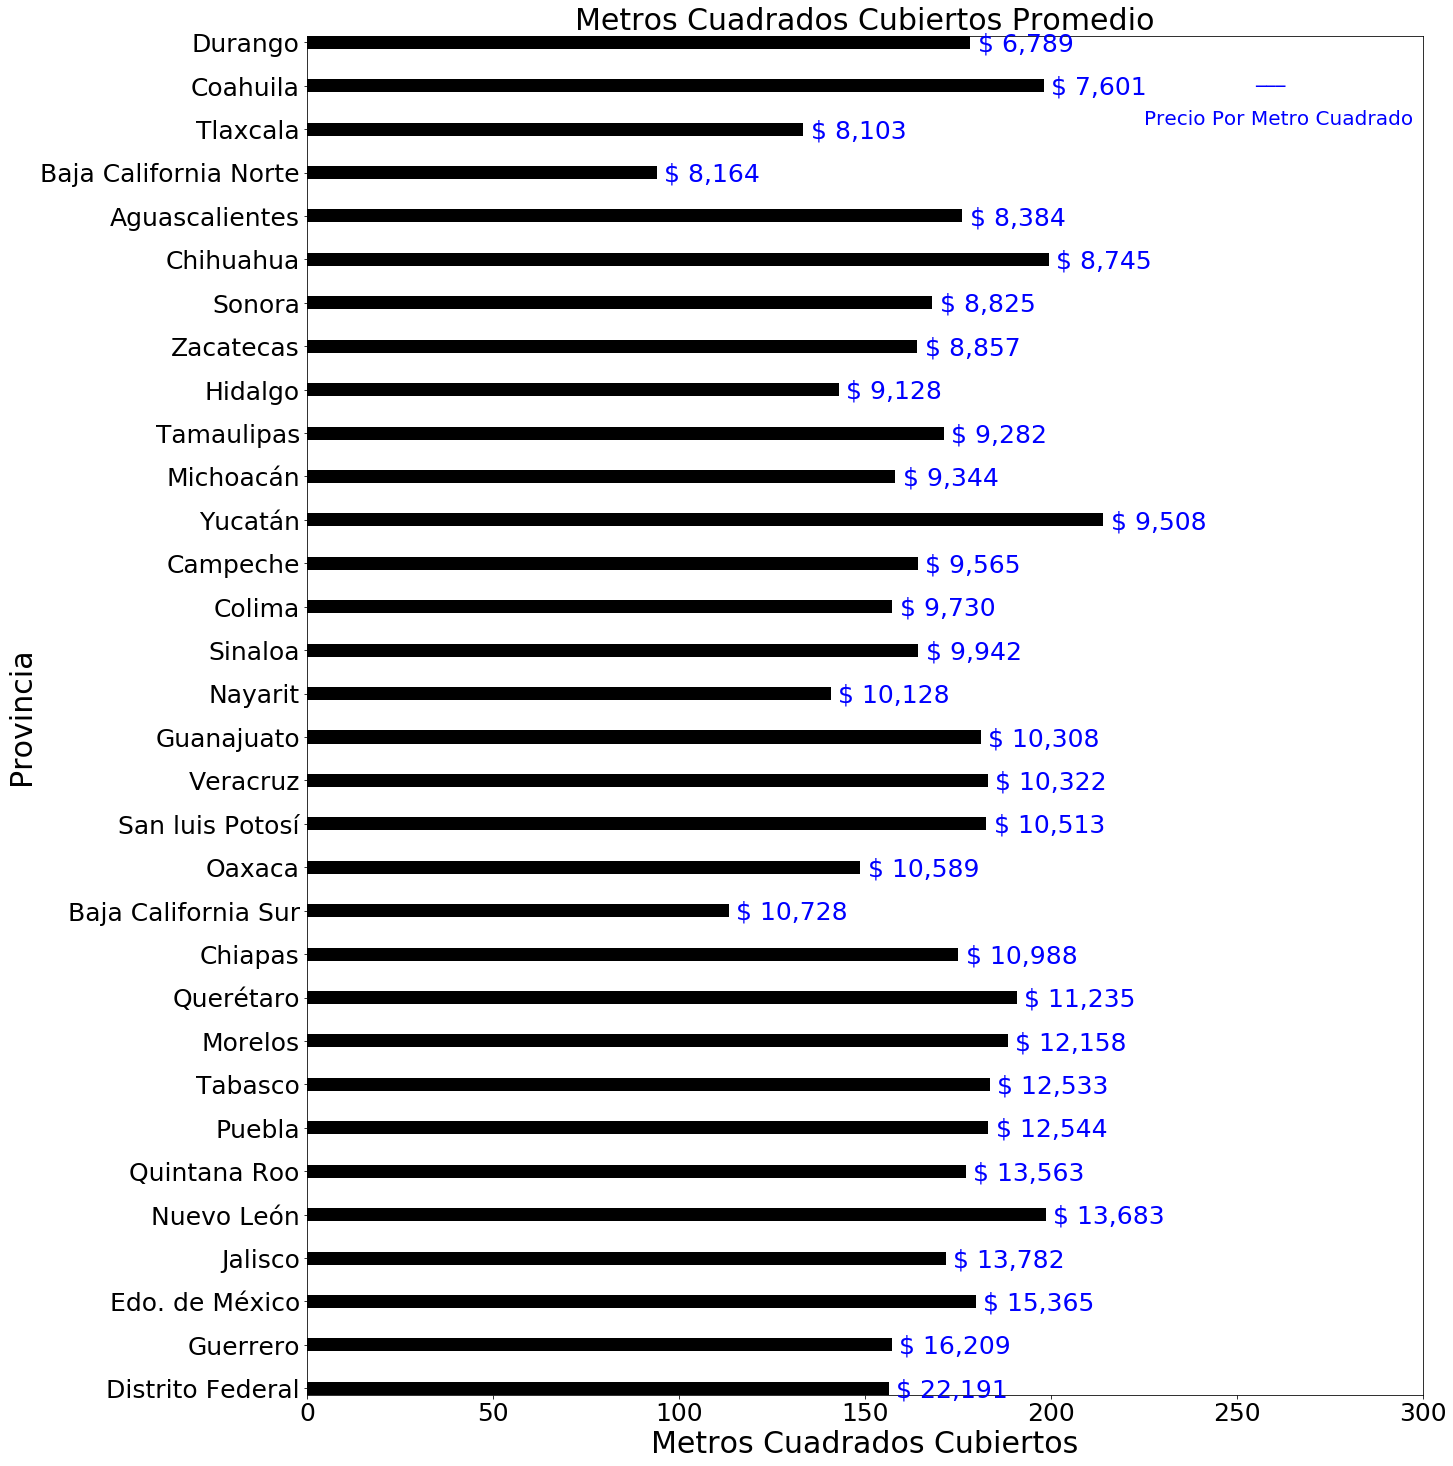

In [202]:
analizarporm2('MetrosCuadradosCubiertos', "Metros Cuadrados Cubiertos Promedio", "Metros Cuadrados Cubiertos")

### 2.2.3. ¿Hay provincias donde se publican más cierto tipo de propiedades?


0.0


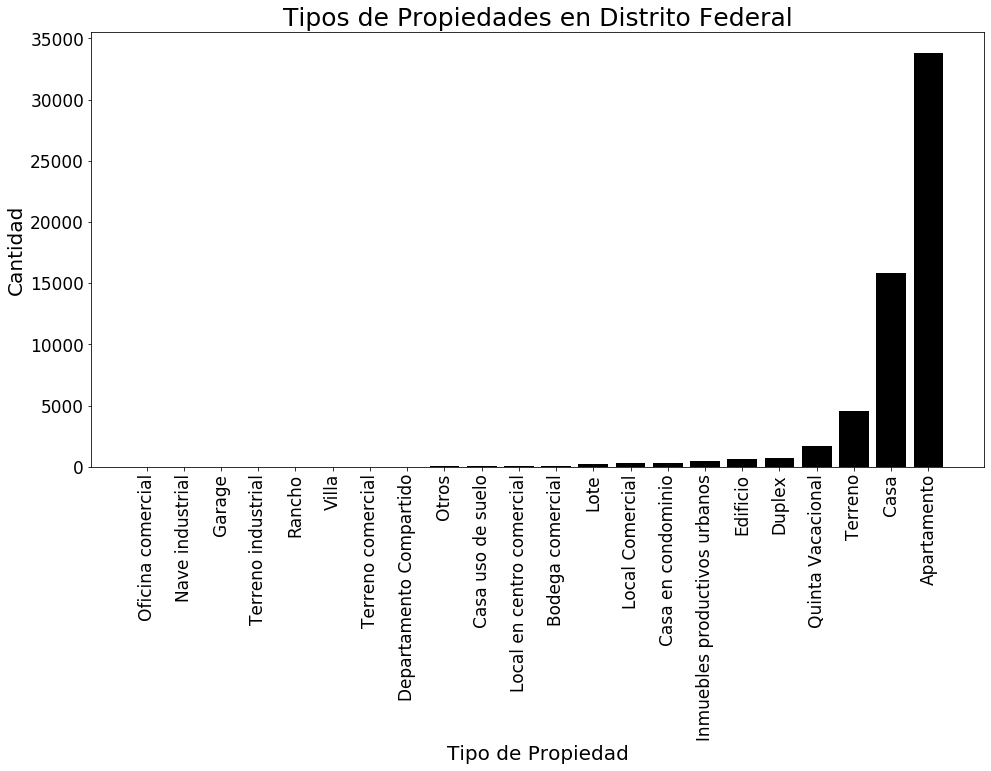

In [203]:
def propiedadesEnProvincia(provincia):
    dfProvincia = dfok[ dfok['Provincia'] == provincia ]

    dfgp = pd.DataFrame()
    
    dfgp['TipoPropiedad'] = dfProvincia['TipoPropiedad'].unique()
   
    dfgp = dfgp.dropna() 
    #Porcentaje de NaN
    print( dfok[ dfok['Provincia'] == provincia].isnull().sum()['TipoPropiedad'] / 
          len(dfok[ dfok['Provincia'] == provincia]['TipoPropiedad']) 
         )


    dfgp['Cantidad'] = dfProvincia.groupby('TipoPropiedad').count()['ID'].to_list()

    dfgp['TipoPropiedad'] = dfgp['TipoPropiedad'].astype('category')
    dfgp = dfgp.sort_values(['Cantidad'])


    x = dfgp['TipoPropiedad'] 
    y = dfgp['Cantidad'] 

    # Tamaño del gráfico
    fig = plt.figure(figsize = (16, 8))

    # Tamaño de los títulos de los ejes
    plt.xlabel("Tipo de Propiedad", fontsize = 20);
    plt.ylabel("Cantidad", fontsize = 20);

    # Título
    plt.title("Tipos de Propiedades en " + provincia, fontsize = 25)
    #Si de esta manera(⬆️) te tira error,hacé :plt.rcParams.update( { 'axes.titlesize':'30' } )
    # mp.rcParams.update( { 'axes.titlesize':'30' } )

    # Tamaño de las letras de los ejes
    plt.tick_params(axis='both', which='major', labelsize = 17)
    plt.tick_params(axis='both', which='minor', labelsize = 17)

    # Rotar ejes
    plt.xticks(rotation = 90)

    # Límites para cada coordenada
    #plt.ylim([13, 34]);
    #plt.xlim([-116, -86]);

    # Tipo de gráfico
    plt.bar(x, y, color = 'black')

    #Línea de regresión
        #ldt = np.poly1d( np.polyfit(x, y, 1) )
        #plt.plot(x, ldt(x), "g")

    # Cajita indicadora de colores 
    #plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), prop={'size': 20})

    # Resetear parámetros: plt.rcParams.update(plt.rcParamsDefault)


    ### PARA REVISAR ####
    #dfok[ dfok['Provincia'] == 'Distrito Federal' ].groupby('TipoPropiedad').count()['ID'].sort_values(ascending = False)
    
propiedadesEnProvincia('Distrito Federal')

0.0


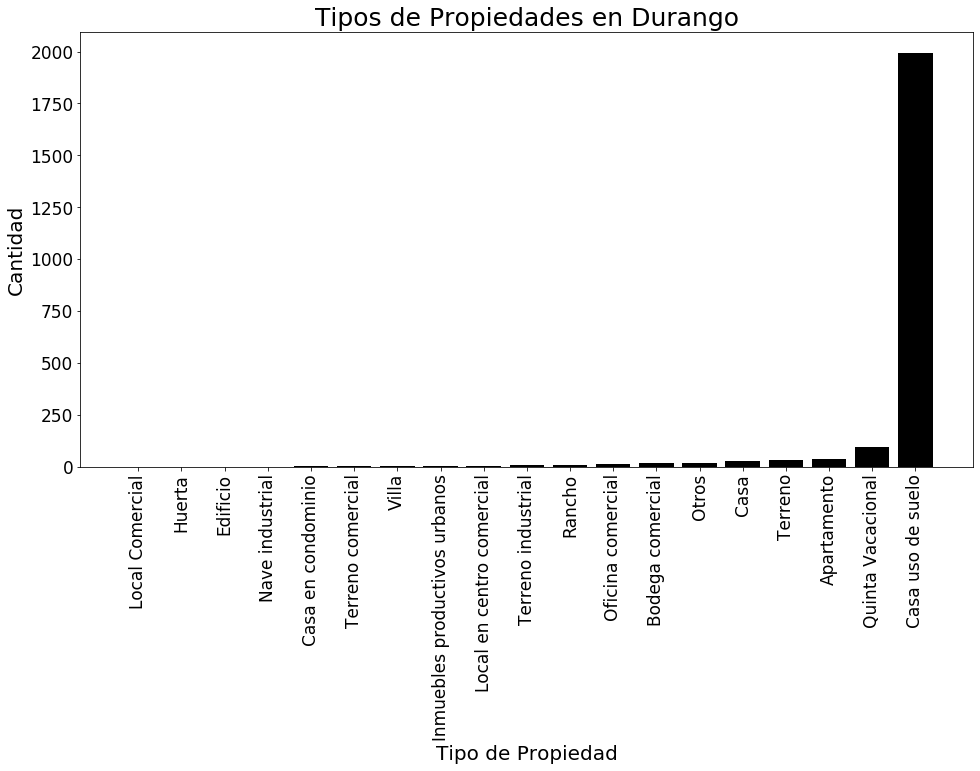

In [204]:
propiedadesEnProvincia('Durango')

In [235]:
def getTiposEn(provincia):
    dfProvincia = dfok[ dfok['Provincia'] == provincia ]

    dfgp = pd.DataFrame()
    
    dfgp['TipoPropiedad'] = dfProvincia['TipoPropiedad'].unique()
   
    dfgp = dfgp.dropna() 

    dfgp['Cantidad'] = dfProvincia.groupby('TipoPropiedad').count()['ID'].to_list()

    dfgp['TipoPropiedad'] = dfgp['TipoPropiedad'].astype('category')
    dfgp = dfgp.sort_values(['Cantidad'])
    
    return dfgp

In [236]:
provincias = dfok['Provincia'].unique()[0:len(dfok['Provincia'].unique()) - 1]
provincias.sort()
for p in provincias:
    df0 = getTiposEn(p)['Cantidad']
    print( df0.max() / df0.sum() )

0.764403879064461
0.8599378881987577
0.8664705882352941
0.7984790874524715
0.8019538188277087
0.8477124183006536
0.9009472259810555
0.7708333333333334
0.5755910869195442
0.8769230769230769
0.6234496683011249
0.8104895104895105
0.5922330097087378
0.8464894882982943
0.6684245220830587
0.8016997167138811
0.6305029303530053
0.7233727810650887
0.7489558861915949
0.7440225035161744
0.6311294501487381
0.6708264657405227
0.49264087468460893
0.6672214956604446
0.8023255813953488
0.9143239625167336
0.7263581488933601
0.7911419887103778
0.8533969010727056
0.7717013888888888
0.8166561514195584
0.851063829787234


En el informe se incluyen los gráficos condensados de todas las provincias, expresados de forma cualitativa.

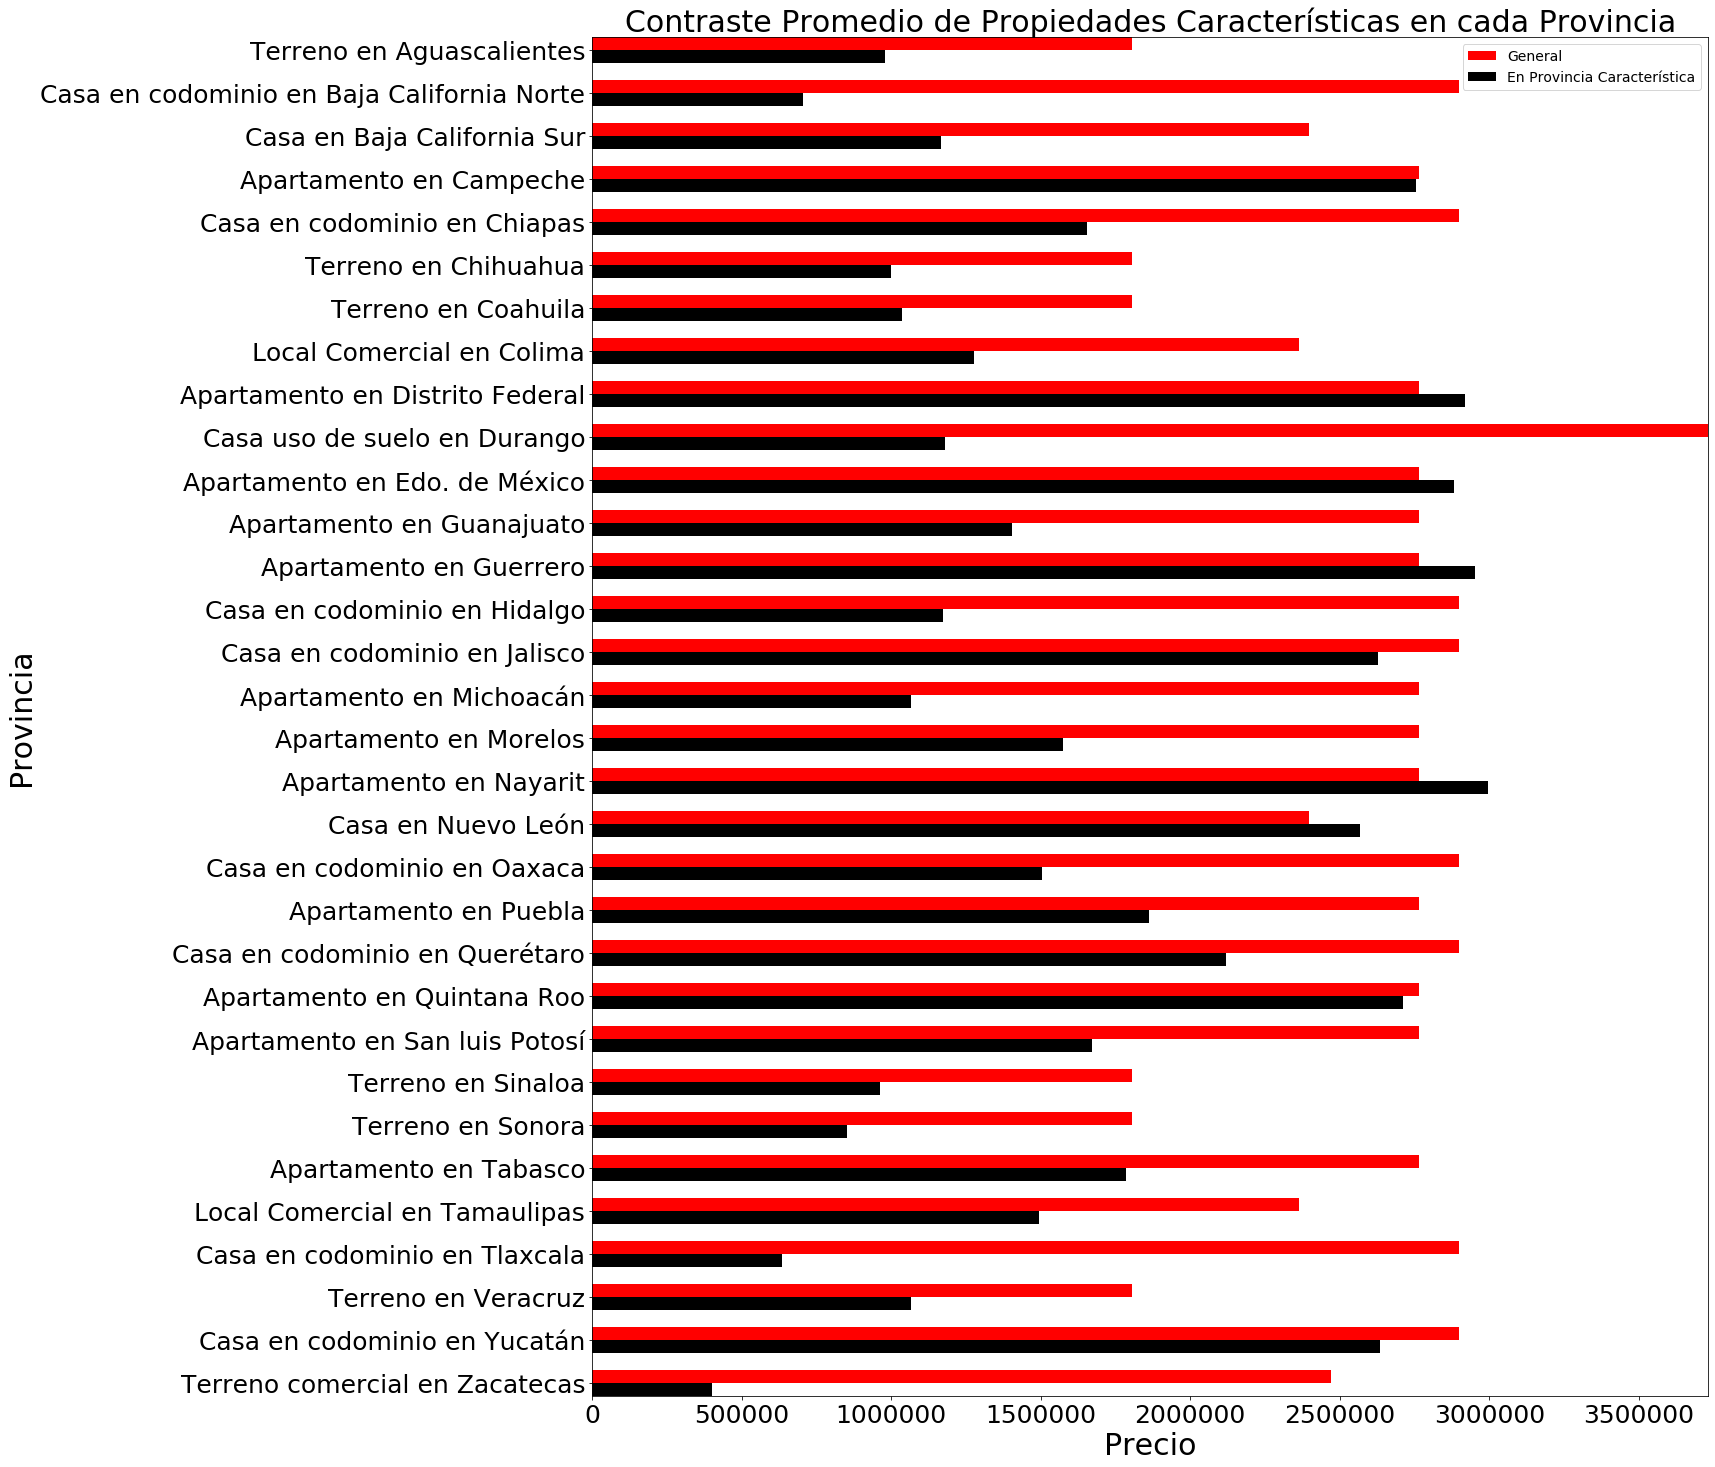

In [237]:
prov = ['Aguascalientes','Baja California Norte',
    'Baja California Sur','Campeche','Chiapas','Chihuahua','Coahuila',
        'Colima','Distrito Federal','Durango','Edo. de México','Guanajuato',
        'Guerrero','Hidalgo','Jalisco','Michoacán','Morelos','Nayarit','Nuevo León',
        'Oaxaca','Puebla','Querétaro','Quintana Roo','San luis Potosí','Sinaloa',
        'Sonora','Tabasco','Tamaulipas','Tlaxcala','Veracruz','Yucatán','Zacatecas' ]

tipo = ['Terreno','Casa en condominio','Casa','Apartamento','Casa en condominio','Terreno','Terreno',
         'Local Comercial','Apartamento','Casa uso de suelo','Apartamento','Apartamento',
         'Apartamento','Casa en condominio','Casa en condominio','Apartamento','Apartamento',
         'Apartamento','Casa','Casa en condominio','Apartamento','Casa en condominio',
         'Apartamento','Apartamento','Terreno','Terreno','Apartamento',
         'Local Comercial','Casa en condominio','Terreno','Casa en condominio','Terreno comercial']

#Promedio de precio en la propiedad especialidad de la
promProv = []

#Promedio de precio por tipo de propiedad
prom = []

for i in range(32):
    promProv.append( dfok[ ( dfok['Provincia'] == prov[i] ) &  ( dfok['TipoPropiedad'] == tipo[i] ) ]['Precio'].mean() )
    prom.append(  dfok[ dfok['TipoPropiedad'] == tipo[i] ]['Precio'].mean() )
    
x = np.arange(len(prov))

ancho = 0.3
fig, ax = plt.subplots(figsize = (20, 25))
plt.barh(x - (ancho/2), prom, ancho, color = 'red', label = 'General')
plt.barh(x + (ancho/2), promProv, ancho, color = 'black', label = 'En Provincia Característica')


prov2 = ['Terreno en Aguascalientes','Casa en codominio en Baja California Norte',
    'Casa en Baja California Sur','Apartamento en Campeche',
	'Casa en codominio en Chiapas','Terreno en Chihuahua','Terreno en Coahuila',
        'Local Comercial en Colima','Apartamento en Distrito Federal',
		'Casa uso de suelo en Durango',
		'Apartamento en Edo. de México','Apartamento en Guanajuato',
        'Apartamento en Guerrero','Casa en codominio en Hidalgo',
		 'Casa en codominio en Jalisco','Apartamento en Michoacán','Apartamento en Morelos'
		 ,'Apartamento en Nayarit','Casa en Nuevo León',
        'Casa en codominio en Oaxaca',
		'Apartamento en Puebla','Casa en codominio en Querétaro',
		'Apartamento en Quintana Roo','Apartamento en San luis Potosí','Terreno en Sinaloa',
        'Terreno en Sonora','Apartamento en Tabasco',
		'Local Comercial en Tamaulipas',
		'Casa en codominio en Tlaxcala','Terreno en Veracruz','Casa en codominio en Yucatán',
		'Terreno comercial en Zacatecas' ]

# Título
plt.title("Contraste Promedio de Propiedades Características en cada Provincia", fontsize = 30)

plt.yticks( np.arange(len(prov2)), np.arange(len(prov2)) + 1)
ax.set_yticklabels(prov2, fontsize=17)

p1 = plt.xlabel("Precio", fontsize = 30);
p2 = plt.ylabel("Provincia", fontsize = 30);
plt.autoscale(tight = True)

plt.tick_params(axis='both', which='major', labelsize = 25)
plt.tick_params(axis='both', which='minor', labelsize = 25)
plt.legend(prop={'size': 14})

ax.invert_yaxis()

## 2.3. Análisis de formación del precio básica

### 2.3.1. ¿Qué tipo de propiedades son más caras en promedio?

<BarContainer object of 24 artists>

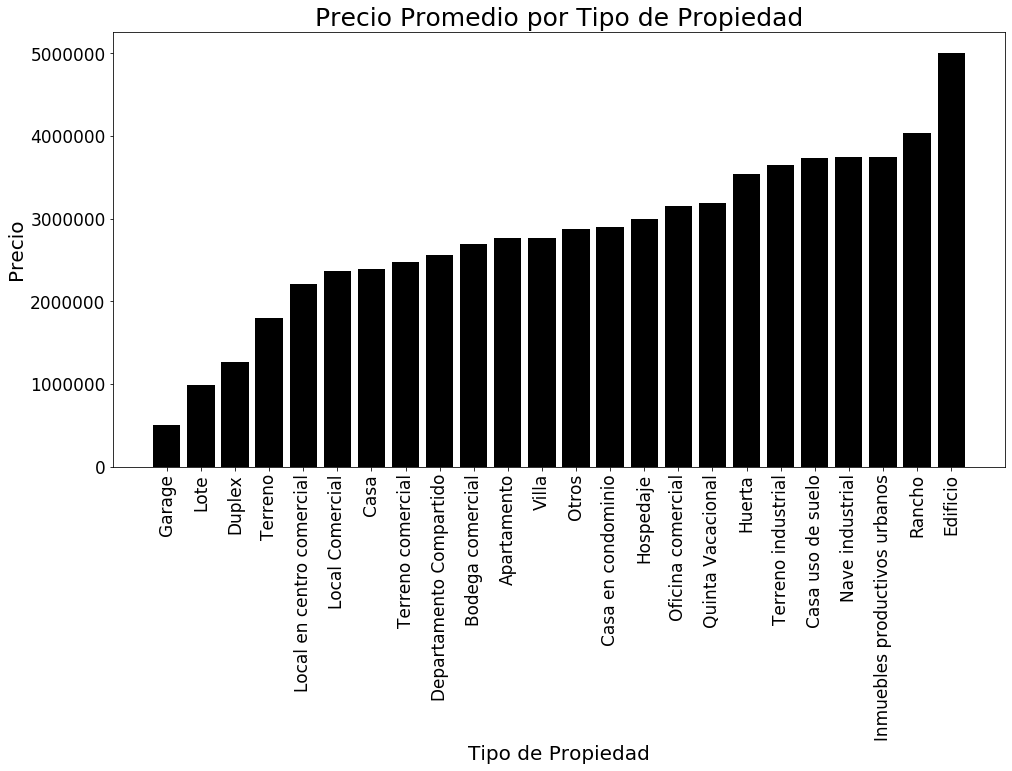

In [206]:
dfPorPropiedad = pd.DataFrame()
dfPorPropiedad['TipoPropiedad'] = pd.Series( dfok['TipoPropiedad'].unique(), index = dfok['TipoPropiedad'].unique() )
dfPorPropiedad['Precio'] = dfok.groupby('TipoPropiedad').mean()['Precio']

dfPorPropiedad = dfPorPropiedad.dropna()
dfPorPropiedad['Precio'] = dfPorPropiedad['Precio'].astype(np.uint32)
dfPorPropiedad['TipoPropiedad'] = dfPorPropiedad['TipoPropiedad'].astype('category')
dfPorPropiedad = dfPorPropiedad.sort_values(['Precio'])

# Variables a graficar
x = dfPorPropiedad['TipoPropiedad']
y = dfPorPropiedad['Precio']

# Tamaño del gráfico
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')


# Tamaño de los títulos de los ejes
plt.xlabel("Tipo de Propiedad", fontsize = 20);
plt.ylabel("Precio", fontsize = 20);

# Título
plt.title("Precio Promedio por Tipo de Propiedad", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
plt.xticks(rotation = 90)

# Límites para cada coordenada

# Tipo de gráficok
plt.bar(x, y, color = 'black')


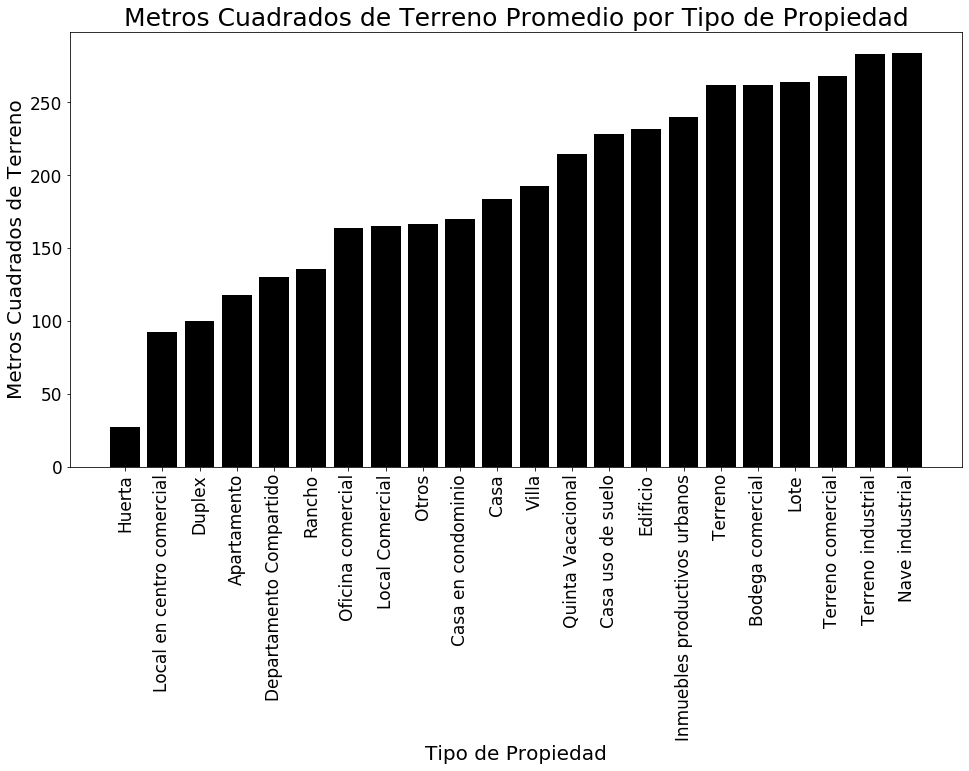

In [207]:
def ppm2(atributo, xlabel, titulo):
    dfaux = dfok.groupby('TipoPropiedad').mean()
    dfaux = dfaux.sort_values(atributo)
     # Sólo se sacan dos publicaciones: las únicas garage y hospedaje
    dfaux = dfaux.drop( index = 'Garage')
    dfaux = dfaux.drop( index = 'Hospedaje')

    if atributo == 'MetrosCuadradosCubiertos':
        dfaux = dfaux.drop( index = 'Lote') #Ninguna de los 5 lotes tiene bien cargado este atributo
    
    # Variables a graficar
    x = dfaux.index.to_list()
    y = dfaux[atributo]

    # Tamaño del gráfico
    fig = plt.figure(figsize = (16, 8))
    ax = fig.add_subplot(111)
    ax.set_aspect('auto')


    # Tamaño de los títulos de los ejes
    plt.xlabel("Tipo de Propiedad", fontsize = 20);
    plt.ylabel(xlabel, fontsize = 20);

    # Título
    plt.title(titulo, fontsize = 25)

    # Tamaño de las letras de los ejes
    plt.tick_params(axis='both', which='major', labelsize = 17)
    plt.tick_params(axis='both', which='minor', labelsize = 17)

    # Rotar ejes
    plt.xticks(rotation = 90)

    # Límites para cada coordenada

    # Tipo de gráficok
    plt.bar(x, y, color = 'black')


ppm2('MetrosCuadradosTotales', "Metros Cuadrados de Terreno", "Metros Cuadrados de Terreno Promedio por Tipo de Propiedad")

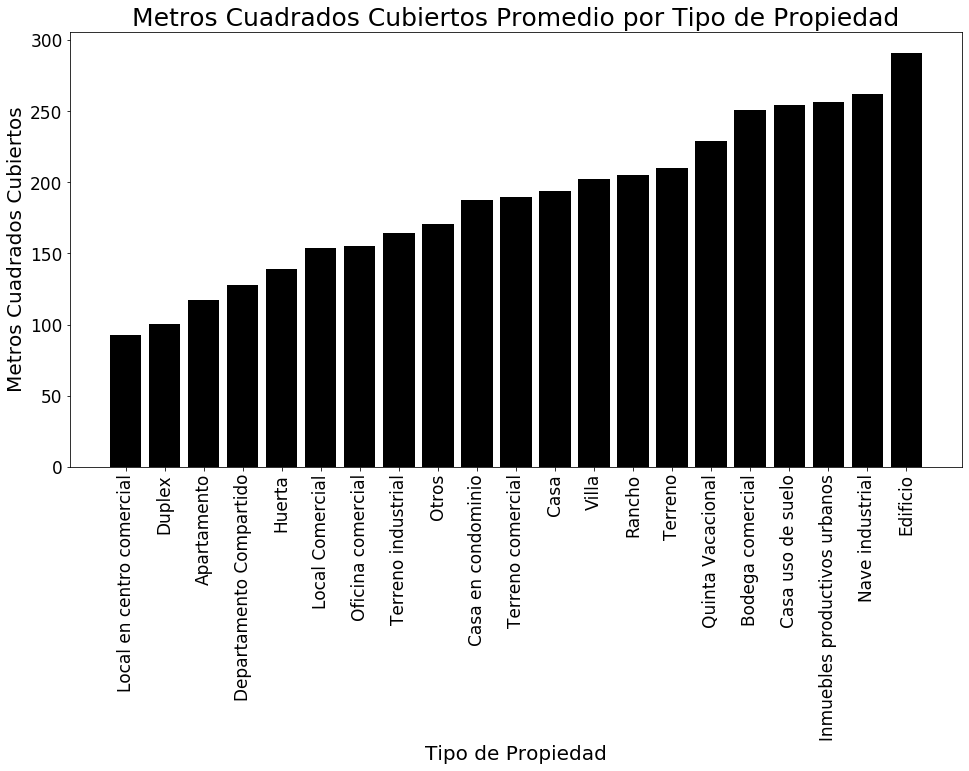

In [208]:

ppm2('MetrosCuadradosCubiertos', "Metros Cuadrados Cubiertos", "Metros Cuadrados Cubiertos Promedio por Tipo de Propiedad")

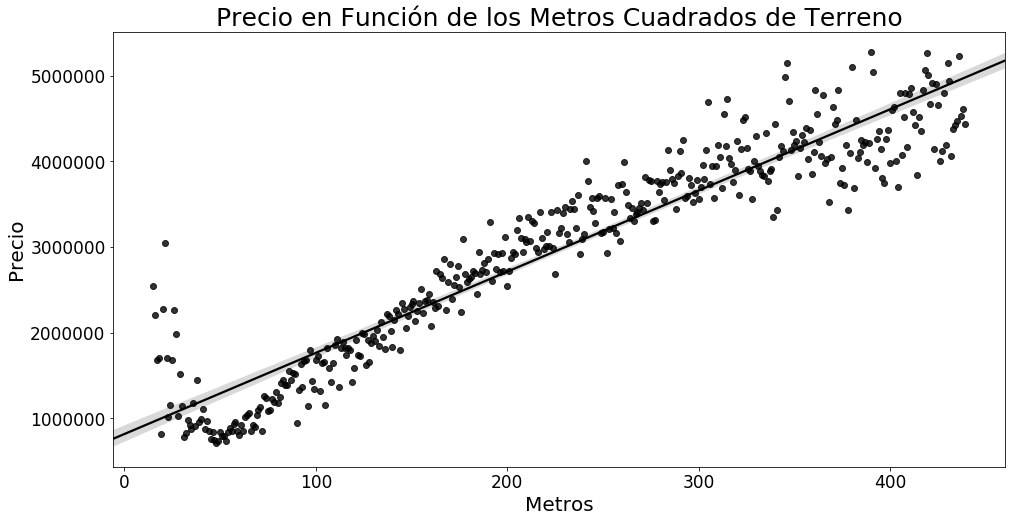

In [209]:
dfPorMetros = pd.DataFrame()
dfPorMetros['Metros'] = pd.Series( dfok['MetrosCuadradosTotales'].unique(), 
                                index = dfok['MetrosCuadradosTotales'].unique() )

dfPorMetros['Precio'] = dfok.groupby('MetrosCuadradosTotales').mean()['Precio']

dfPorMetros = dfPorMetros.dropna() # Nos quedamos con más del 80%

dfPorMetros['Precio'] = dfPorMetros['Precio'].astype(np.uint32)
dfPorMetros['Metros'] = dfPorMetros['Metros'].astype(np.uint16)

# Variables a graficar
#x = dfPorMetros['Metros']
#y = dfPorMetros['Precio']

# Tamaño del gráfico
grafico = plt.figure(figsize = (16, 8));

# Tamaño de los títulos de los ejes
plt.xlabel("Metros Cuadrados", fontsize = 20);
plt.ylabel("Precio", fontsize = 20);

# Título
plt.title("Precio en Función de los Metros Cuadrados de Terreno", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
#plt.xticks(rotation = 90)

# Límites para cada coordenada

# Tipo de gráficok
#plt.scatter(x, y, color = 'black')

#Línea de regresión
#regre = np.poly1d( np.polyfit(x, y, 1) )
#plt.plot(x, regre(x), "red", linewidth = 5);

sb.regplot(x = "Metros", y = "Precio", data = dfPorMetros, color = 'black');

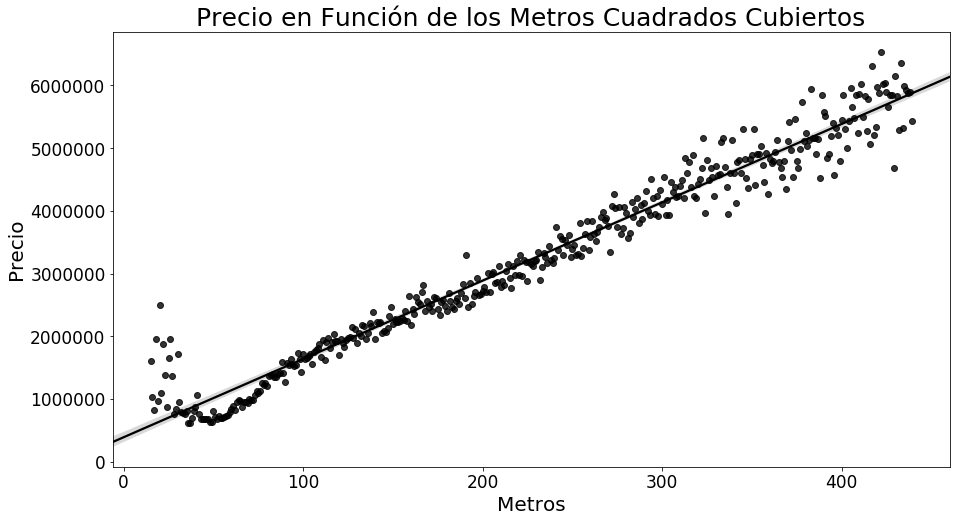

In [210]:
dfPorMetros = pd.DataFrame()
dfPorMetros['Metros'] = pd.Series( dfok['MetrosCuadradosCubiertos'].unique(), 
                                index = dfok['MetrosCuadradosCubiertos'].unique() )

dfPorMetros['Precio'] = dfok.groupby('MetrosCuadradosCubiertos').mean()['Precio']

dfPorMetros = dfPorMetros.dropna() # Nos quedamos con más del 92%

dfPorMetros['Precio'] = dfPorMetros['Precio'].astype(np.uint32)
dfPorMetros['Metros'] = dfPorMetros['Metros'].astype(np.uint16)

# Variables a graficar
#x = dfPorMetros['Metros']
#y = dfPorMetros['Precio']

# Tamaño del gráfico
fig = plt.figure(figsize = (15,  8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')

# Tamaño de los títulos de los ejes
plt.xlabel("Metros Cuadrados", fontsize = 20);
plt.ylabel("Precio", fontsize = 20);

# Título
plt.title("Precio en Función de los Metros Cuadrados Cubiertos", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
#plt.xticks(rotation = 90)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
#plt.scatter(x, y, color = 'black')

#Línea de regresión
#regre = np.poly1d( np.polyfit(x, y, 1) )
#plt.plot(x, regre(x), "red", linewidth = 5);

sb.regplot(x = "Metros", y = "Precio", data = dfPorMetros, color = 'black');

En resumen, se vio que los tipos de propiedades más caros parecen ser los que más área tienen en promedio, habiendo una dependencia aproximadamente lineal del precio con respecto a la cantidad de metros cuadrados.

Sin embargo, esto es una tendencia, y no un comportamiento generalizado. Un caso particular de estas excepciones que se toma para analizar es el de las casas y los departamentos.

<BarContainer object of 22 artists>

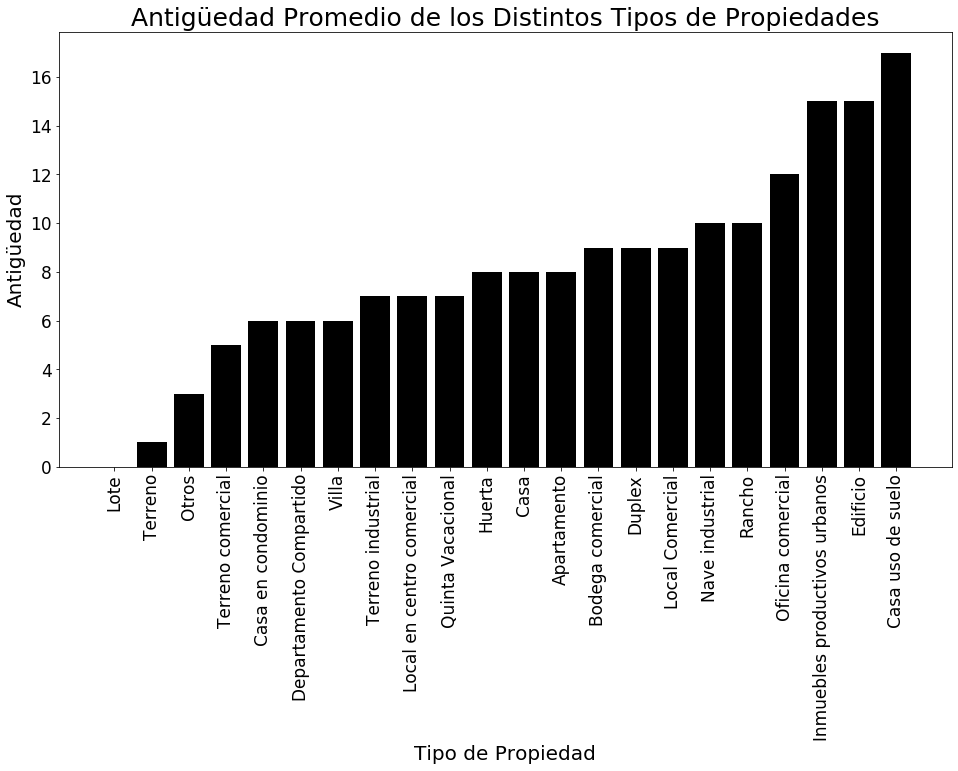

In [211]:
dfPorAntiguedad = pd.DataFrame()
dfPorAntiguedad['TipoPropiedad'] = pd.Series( dfok['TipoPropiedad'].unique(), 
                                index = dfok['TipoPropiedad'].unique() )

dfPorAntiguedad['Antiguedad'] = dfok.groupby('TipoPropiedad')['Antiguedad'].mean()

dfPorAntiguedad = dfPorAntiguedad.dropna() #80%

dfPorAntiguedad['TipoPropiedad'] = dfPorAntiguedad['TipoPropiedad'].astype('category')
dfPorAntiguedad['Antiguedad'] = dfPorAntiguedad['Antiguedad'].astype(np.uint8)

dfPorAntiguedad = dfPorAntiguedad.sort_values(['Antiguedad'])

# Variables a graficar
y = dfPorAntiguedad['Antiguedad']
x = dfPorAntiguedad['TipoPropiedad']

# Tamaño del gráfico
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')

# Tamaño de los títulos de los ejes
plt.ylabel("Antigüedad", fontsize = 20);
plt.xlabel("Tipo de Propiedad", fontsize = 20);

# Título
plt.title("Antigüedad Promedio de los Distintos Tipos de Propiedades", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
plt.xticks(rotation = 90)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
plt.bar(x, y, color = 'black')

#Línea de regresión
#ldt = np.poly1d( np.polyfit(x, y, 1) )
#plt.plot(x, ldt(x), "g")


### 2.3.2. ¿Por qué los departamentos son en promedio más caros que las casas?

In [212]:
casas = dfok[ dfok['TipoPropiedad'] == 'Casa'];
1999307 / pow(len(casas), 1/2) #De Moivre

5310.90473707445

In [213]:
dptos = dfok[ dfok['TipoPropiedad'] == 'Apartamento']
2342775 / pow(len(dptos), 1/2) #De Moivre

9783.583359412307

In [215]:
len(casas)

141717

In [216]:
len(dptos)

57341

Text(0.5, 1.05, 'Comparación de Características Promedio de Casas y Departamentos')

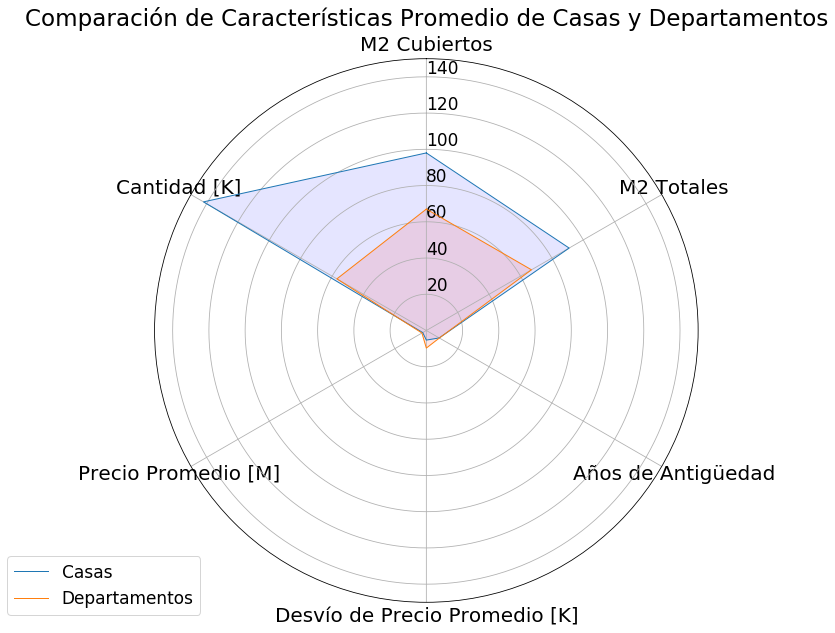

In [217]:
''' 
CÓDIGO DEL RADAR CHART SACADA DE
https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
'''

dfradar = pd.DataFrame({
    'Propiedad': ['Casas','Departamentos'],
'M2 Cubiertos': [98, 67],
    'M2 Totales': [91, 67],
'Años de Antigüedad': [8.2, 8.3],
    'Desvío de Precio Promedio [K]': [5.3, 9.7],
'Precio Promedio [M]': [2.3, 2.8],
'Cantidad [K]': [142, 57]
})
    
categories=list(dfradar)[1:]
N = len(categories)

# Ajustar ángulos
angulos = [n / float(N) * 2 * 3.1415 for n in range(N)]
angulos += angulos[:1]
 
# Crear radar
grafico = plt.figure(figsize = (15, 10));
ax = plt.subplot(111, polar = True)
# Variables en orden
ax.set_theta_offset(3.1415 / 2)
ax.set_theta_direction(-1)
 
# Poner nombres de las variables
plt.xticks(angulos[:-1], categories, color='black', size=20)
 
# Límites para las variables
ax.set_rlabel_position(0)
plt.yticks(color="black", size=17)
plt.ylim(0,150)
  
# Casas
values = dfradar.loc[0].drop('Propiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angulos, values, linewidth=1, linestyle='solid', label="Casas")
ax.fill(angulos, values, 'b', alpha=0.1)
 
# Dptos
values = dfradar.loc[1].drop('Propiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angulos, values, linewidth=1, linestyle='solid', label="Departamentos")
ax.fill(angulos, values, 'r', alpha=0.1)

#Cartelito
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), prop={'size': 17})

plt.title("Comparación de Características Promedio de Casas y Departamentos", fontsize = 23)


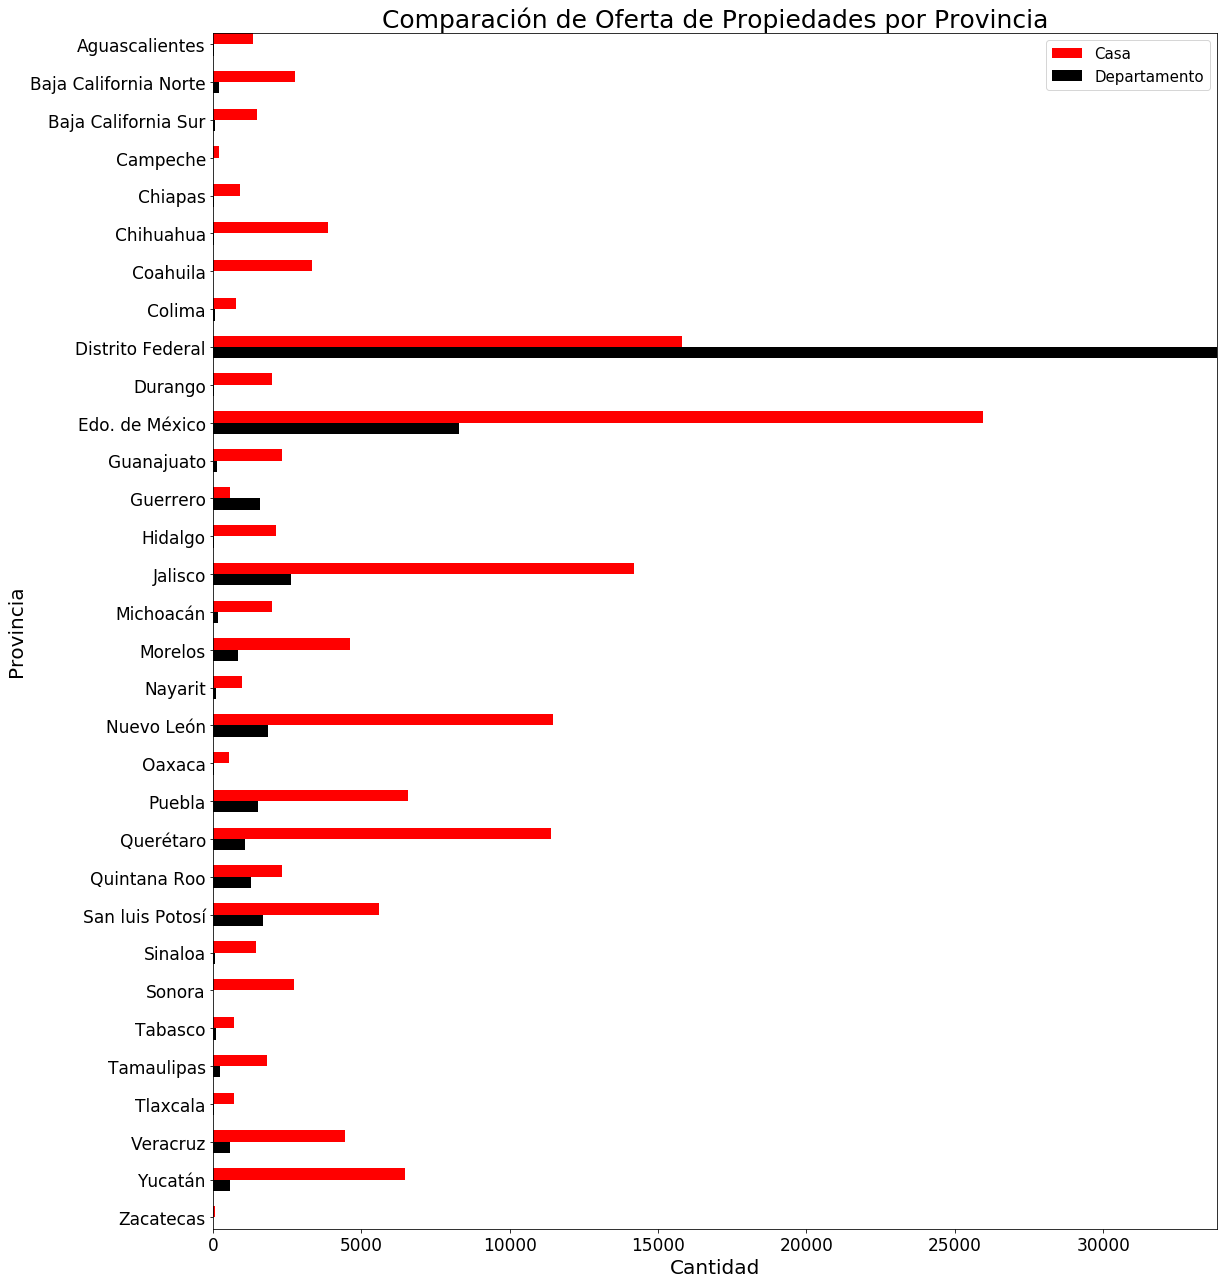

In [218]:
prov = ['Aguascalientes','Baja California Norte',
    'Baja California Sur','Campeche','Chiapas','Chihuahua','Coahuila',
        'Colima','Distrito Federal','Durango','Edo. de México','Guanajuato',
        'Guerrero','Hidalgo','Jalisco','Michoacán','Morelos','Nayarit','Nuevo León',
        'Oaxaca','Puebla','Querétaro','Quintana Roo','San luis Potosí','Sinaloa',
        'Sonora','Tabasco','Tamaulipas','Tlaxcala','Veracruz','Yucatán','Zacatecas' ]

casas = []
dptos = []

for i in range(32):
    casas.append( dfok[ ( dfok['Provincia'] == prov[i] ) & ( dfok['TipoPropiedad'] == 'Casa' ) ]['Precio'].count() )
    dptos.append( dfok[ ( dfok['Provincia'] == prov[i] ) & ( dfok['TipoPropiedad'] == 'Apartamento' ) ]['Precio'].count() )
        
x = np.arange(len(prov))

ancho = 0.3
fig, ax = plt.subplots(figsize = (18, 22))
plt.barh(x - (ancho/2), casas, ancho, color = 'red', label = 'Casa')
plt.barh(x + (ancho/2), dptos, ancho, color = 'black', label = 'Departamento')

plt.yticks( np.arange(len(prov)), np.arange(len(prov)) + 1)
ax.set_yticklabels(prov, fontsize=17)

p1 = plt.xlabel("Cantidad", fontsize = 20);
p2 = plt.ylabel("Provincia", fontsize = 20);
plt.autoscale(tight = True)

plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)
plt.legend(prop={'size': 15})


plt.title("Comparación de Oferta de Propiedades por Provincia", fontsize = 25)


ax.invert_yaxis()

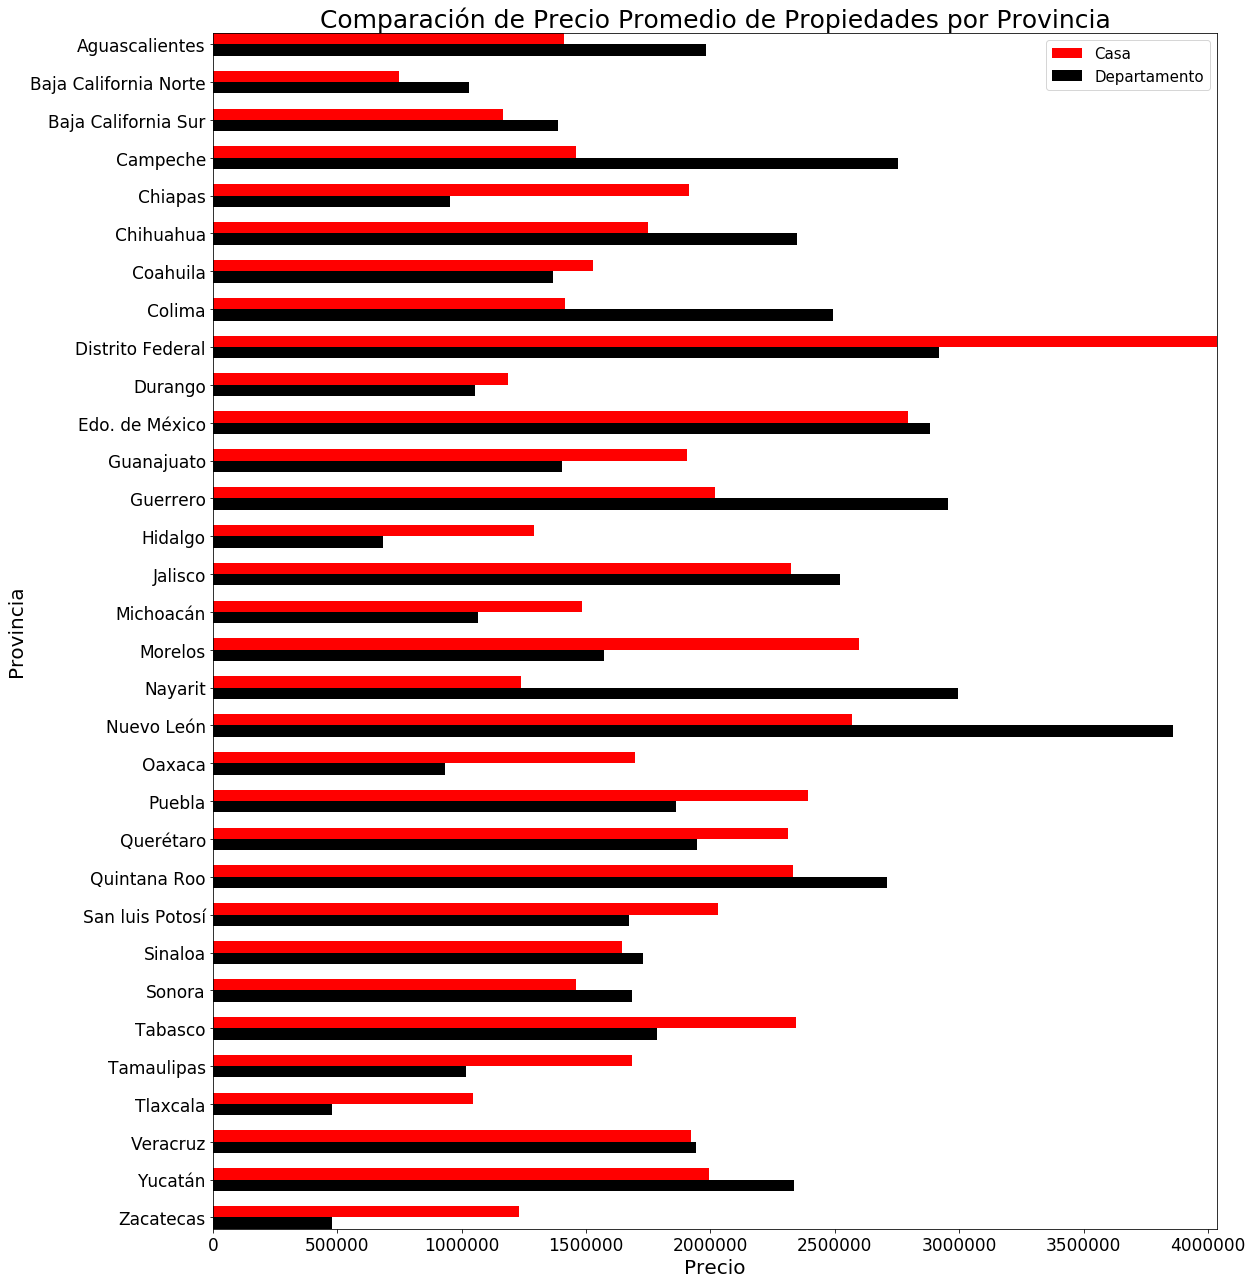

In [219]:
casas = []
dptos = []

for i in range(32):
    casas.append( dfok[ ( dfok['Provincia'] == prov[i] ) & ( dfok['TipoPropiedad'] == 'Casa' ) ]['Precio'].mean() )
    dptos.append( dfok[ ( dfok['Provincia'] == prov[i] ) & ( dfok['TipoPropiedad'] == 'Apartamento' ) ]['Precio'].mean() )
        
x = np.arange(len(prov))

ancho = 0.3
fig, ax = plt.subplots(figsize = (18, 22))
plt.barh(x - (ancho/2), casas, ancho, color = 'red', label = 'Casa')
plt.barh(x + (ancho/2), dptos, ancho, color = 'black', label = 'Departamento')

plt.yticks( np.arange(len(prov)), np.arange(len(prov)) + 1)
ax.set_yticklabels(prov, fontsize=17)

p1 = plt.xlabel("Precio", fontsize = 20);
p2 = plt.ylabel("Provincia", fontsize = 20);
plt.autoscale(tight = True)

plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)
plt.legend(prop={'size': 15})


plt.title("Comparación de Precio Promedio de Propiedades por Provincia", fontsize = 25)

ax.invert_yaxis()

### 2.3.3. ¿Cómo se distribuye el precio de las propiedades? ¿Sigue alguna distribución conocida?

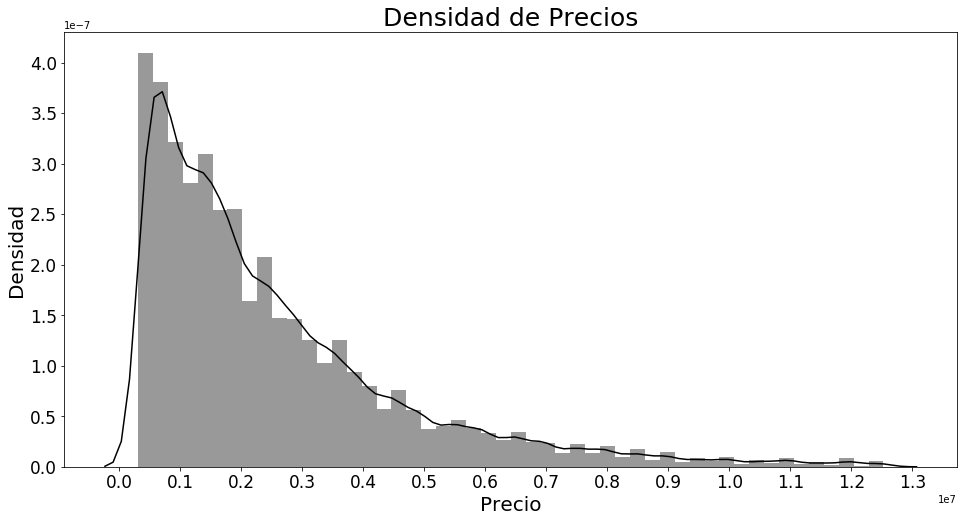

In [239]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')
sb.distplot(dfok['Precio'], color = 'black')
plt.xticks([i for i in range(0,14000000, 1000000)])
plt.xlabel("Precio", fontsize=20)
plt.ylabel("Densidad", fontsize=20)
plt.title("Densidad de Precios", fontsize=25);
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

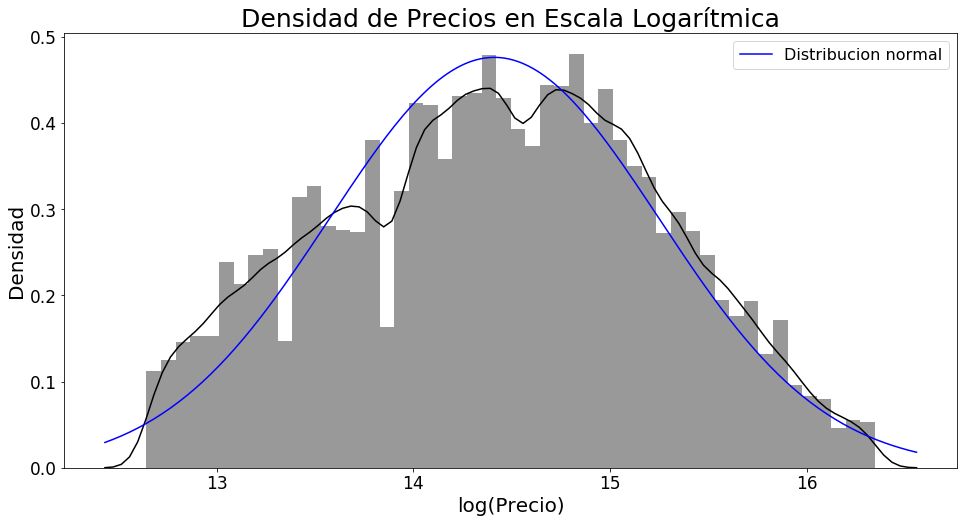

In [241]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')
sb.distplot(np.log(dfok['Precio']), color = 'black', fit=norm, fit_kws={"color":"blue"})
# plt.xticks([i for i in range(0,14000000, 1000000)])
plt.xlabel("log(Precio)", fontsize=20)
plt.ylabel("Densidad", fontsize=20)
plt.legend(["Distribucion normal"], fontsize=16)
plt.title("Densidad de Precios en Escala Logarítmica", fontsize=25)
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17);

El precio distribuye aproximadamente como una log-normal.

### 2.3.4. ¿Cómo evolucionó el precio promedio de las propiedades publicadas en el tiempo?

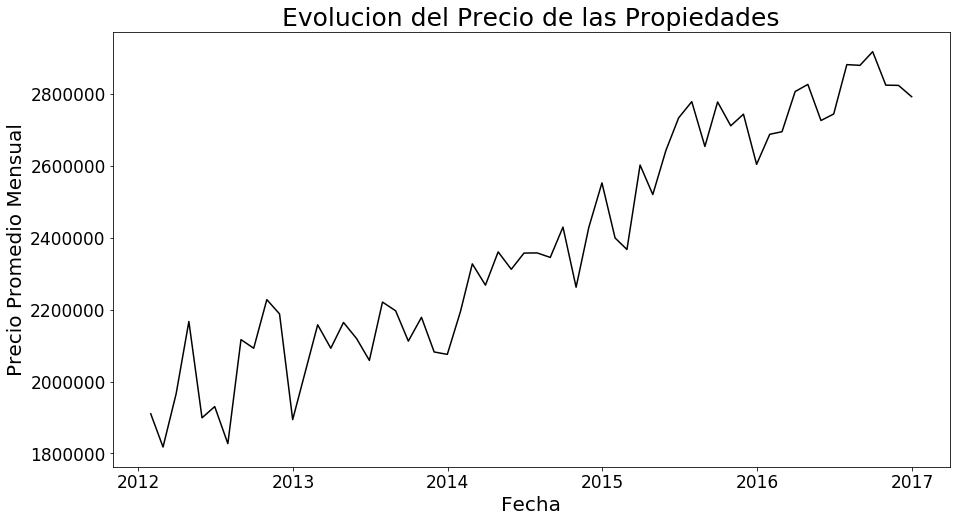

In [245]:
df_pt = dfok.copy()
df_pt["Fecha"] = df_pt["Fecha"].astype('datetime64')
df_pt.index = df_pt["Fecha"]
df_pt = df_pt.resample('M').mean()[["Precio"]].sort_index()
df_pt["Fecha"] = df_pt.index

plt.figure(figsize=(15,8))
plt.plot("Fecha", "Precio", data=df_pt, color="black")
plt.title("Evolucion del Precio de las Propiedades", fontsize=25)
plt.xlabel("Fecha", fontsize=20)
plt.ylabel("Precio Promedio Mensual", fontsize=20);

plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17);

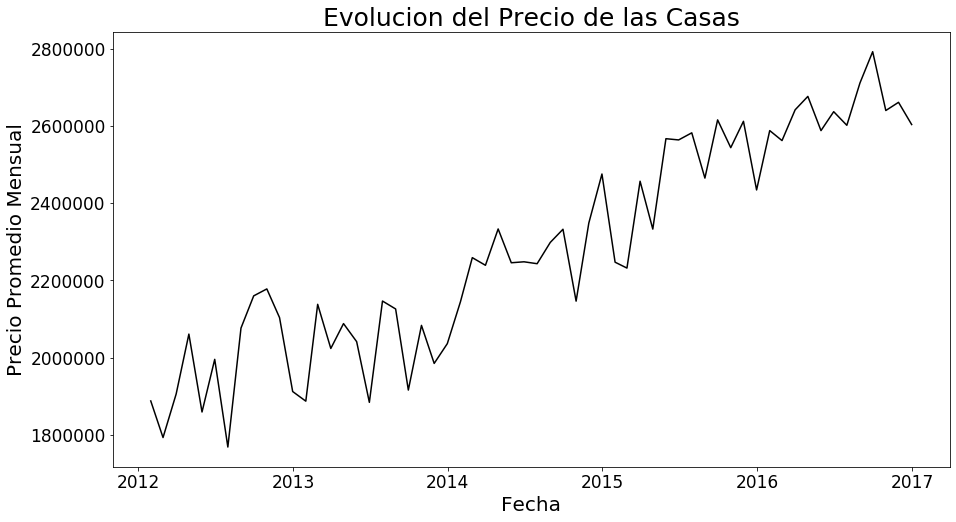

In [255]:
df_pt = dfok[dfok['TipoPropiedad'] == 'Casa'].copy()
df_pt["Fecha"] = df_pt["Fecha"].astype('datetime64')
df_pt.index = df_pt["Fecha"]
df_pt = df_pt.resample('M').mean()[["Precio"]].sort_index()
df_pt["Fecha"] = df_pt.index

plt.figure(figsize=(15,8))
plt.plot("Fecha", "Precio", data=df_pt, color="black")
plt.title("Evolucion del Precio de las Casas", fontsize=25)
plt.xlabel("Fecha", fontsize=20)
plt.ylabel("Precio Promedio Mensual", fontsize=20);

plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17);

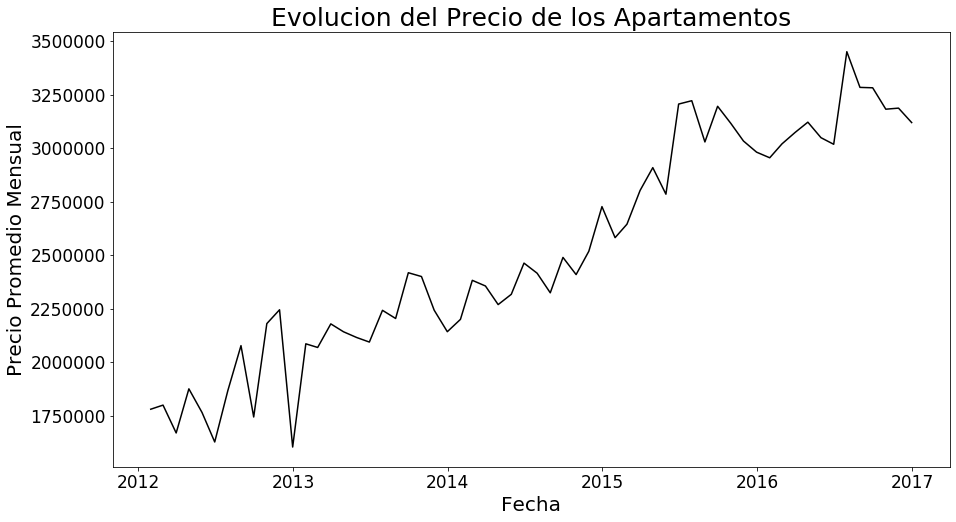

In [254]:
df_pt = dfok[dfok['TipoPropiedad'] == 'Apartamento'].copy()
df_pt["Fecha"] = df_pt["Fecha"].astype('datetime64')
df_pt.index = df_pt["Fecha"]
df_pt = df_pt.resample('M').mean()[["Precio"]].sort_index()
df_pt["Fecha"] = df_pt.index

plt.figure(figsize=(15,8))
plt.plot("Fecha", "Precio", data=df_pt, color="black")
plt.title("Evolucion del Precio de los Apartamentos", fontsize=25)
plt.xlabel("Fecha", fontsize=20)
plt.ylabel("Precio Promedio Mensual", fontsize=20);

plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17);

## 2.4. Análisis de Comodidades